In [21]:
import scipy as sp
import numpy as np
import numpy.random as rd
import scipy.linalg as LA
import scipy.sparse.linalg as sLA
import time
from numpy import save,load

import matplotlib.pyplot as plt
%matplotlib inline

from RMG import RMG

In [22]:
import seaborn as sns
sns.set(style='darkgrid')

In [23]:
def lambda_funct (evlA,evlB,T):
    #tt = np.all(evlA==0) or np.all(evlB==0)
    if T!=0:
        return evlA+sp.special.lambertw(evlB*T*np.exp(-evlA*T))/T
    elif T==0:# and tt:
        return (evlA+evlB)

In [24]:
#EIGENVALUES COMPUTATION
def comp_eig(M, sparse='no',symm='no'):
    evl=0
    if symm == 'no':
        if sparse =='no':
            evl = LA.eigvals(M)
        if sparse =='yes':
            mm = sp.sparse.csr_matrix(M)
            evl = sLA.eigs(mm,k=1,which='LR',return_eigenvectors=False)
    if symm == 'yes':
        if sparse =='no':
            evl = LA.eigvalsh(M)
        if sparse =='yes':
            mm = sp.sparse.csr_matrix(M)
            evl = sLA.eigsh(mm,k=1,which='LA',return_eigenvectors=False)
    return evl

def comp_eig_delay(A, B, T, symm='no'):
    if np.all(A == 0):
        evlB = comp_eig(B, sparse='no',symm=symm)
        return lambda_funct (0,evlB,T)
    else:
        evlA = comp_eig(A, sparse='no',symm=symm)
        evlB = comp_eig(B, sparse='no',symm=symm)
        return lambda_funct (evlA,evlB,T)

In [25]:
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf',
          '#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf',
          '#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf']

# Linearization of a generic Delayed ODE

We consider the ordinary differential equation $\quad\dfrac{d\vec{x}}{dt} = f\big(\vec{x}(t),\vec{x}(t-T)\big)\quad$ which can be linearized near the equilibrium $x^*$ given by: $f(x^*,x^*)$ obtaining the linear system of ODE:
$$\dfrac{d\vec{y}}{dt} = \ A\cdot\vec{y}(t)\ +\ B\cdot\vec{y}(t-T)\qquad\text{with:}\qquad y=x-x^*$$

Here A and B are the Jacobian matrices, we can substitute them with Random Matrices and then study the system using the Random Matrix Theory.

# Maximal Re($\lambda$) vs. S, T

## Case $A=-\mathbb{1},\quad B=R.M.$

In [26]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

complexity = sigma*np.sqrt(S*C)
Class = RMG(S,C,d,mu,sigma)

In [ ]:
#FINAL VERSION
Class.d = 1
Class.C = 0.4
Class.sigma = 0.1
Class.S = 1000

Iterations = 10
I = np.vectorize(int)
Tvec = [0,0.2,0.5,0.7,1,2]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
data = np.zeros((len(Svec),10,Iterations)) #Here the maximal number of delays accepted is ten

for i,S in enumerate(Svec):
    print(S)
    Class.S = S
    for tt in range(Iterations):
        Class.ran_matrix()
        for j,T in enumerate(Tvec): 
            evl  = comp_eig_delay(-np.eye(Class.S),Class.M,T)
            data[i,j,tt] = np.amax(evl.real)

In [43]:
#save('data_FINAL_maxeig.npy', data)
data = load('data/data_FINAL_maxeig.npy')
Std  = np.std(data,axis=2)
EE = np.mean(data,axis=2)

I = np.vectorize(int)
Tvec = [0,0.2,0.5,0.7,1,2]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))

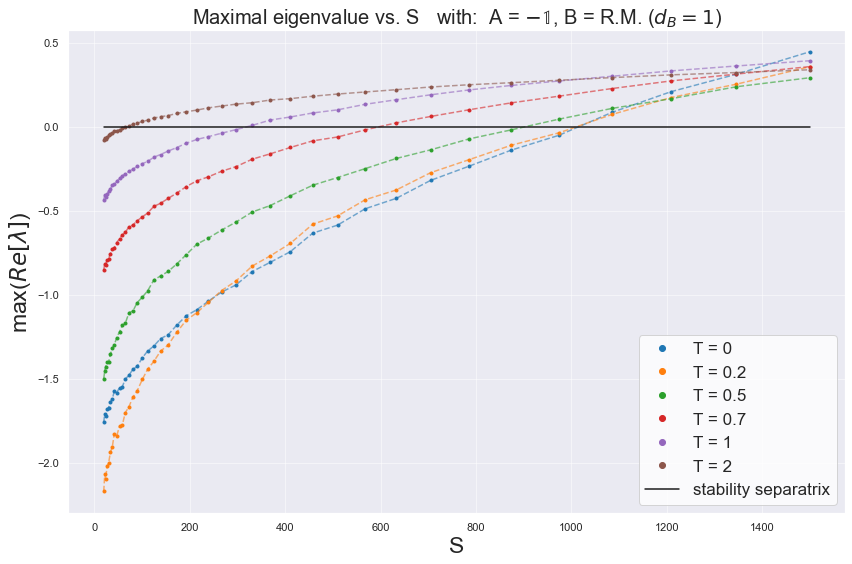

In [44]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

for j,T in enumerate(Tvec):
    plt.plot(Svec,EE[:,j],'.',color=colors[j],label=f'T = {T}')
    plt.plot(Svec,EE[:,j],'--',color=colors[j],alpha=0.6)

plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=1)

plt.title(r'Maximal eigenvalue vs. S $\ $ with:  A = $-\mathbb{1}$, B = R.M. ($d_B=1$)',fontsize=20)
plt.grid(which="both",alpha=0.5)
plt.legend(fontsize=17,markerscale=2,loc='lower right',facecolor='w')

plt.xlabel('S',fontsize=23)
plt.ylabel('max($Re[\lambda]$)',fontsize=23)

    
fig.tight_layout()
plt.show(fig)
fig.savefig('final_figures/Maxeig_ran_S1000_C0.4_s0.1.png',format='png')

In [ ]:
Class.d = 1
Class.C = 0.4
Class.sigma = 0.1
Class.S = 1000

Iterations = 30
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
Svec = [500,800,1000,1200,1500]
data = np.zeros((len(Svec),len(Tvec),Iterations))

for i,S in enumerate(Svec):
    print(S)
    Class.S = S
    for tt in range(Iterations):
        Class.ran_matrix()
        evlB = comp_eig(Class.M)
        for j,T in enumerate(Tvec): 
            evl  = lambda_funct (-np.ones(Class.S),evlB,T)
            data[i,j,tt] = np.amax(evl.real)

In [40]:
#save('data_FINAL_maxeig_T.npy', data)
data = load('data/data_FINAL_maxeig_T.npy')
Std  = np.std(data,axis=2)
EE = np.mean(data,axis=2)
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
Svec = [500,800,1000,1200,1500]

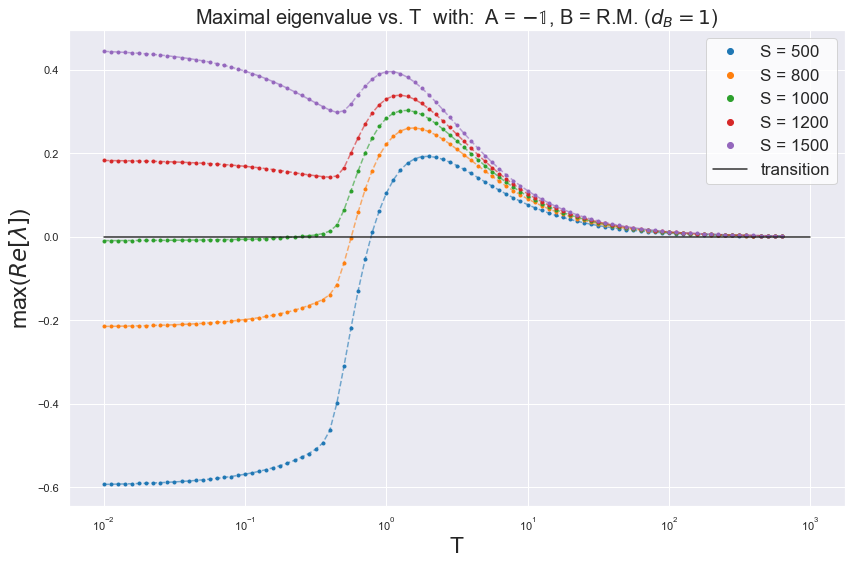

In [41]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

for j,S in enumerate(Svec):
    plt.plot(Tvec,EE[j,:],'.',color=colors[j],label=f'S = {S}')
    plt.plot(Tvec,EE[j,:],'--',color=colors[j],alpha=0.6)  

plt.plot(Tvec,np.zeros(len(Tvec)),'k-',label='transition',alpha=0.9)
plt.xscale('log')

#plt.grid(which="both",alpha=0.5)
plt.legend(fontsize=17,markerscale=2,loc='upper right',facecolor='w')
plt.xlabel('T',fontsize=23)
plt.ylabel('max($Re[\lambda]$)',fontsize=23)
plt.title(r'Maximal eigenvalue vs. T $\ $with:  A = $-\mathbb{1}$, B = R.M. ($d_B=1$)',fontsize=20)

fig.tight_layout()
plt.show(fig)
fig.savefig('final_figures/Maxeig_T_ran_S1000_C0.4_s0.1.png',format='png')

In [ ]:
Class.d = 1
Class.C = 0.4
Class.sigma = 0.1
Class.S = 1000

Iterations = 10
I = np.vectorize(int)
Tvec = [0,0.2,0.5,0.7,1,2]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
data = np.zeros((len(Svec),10,Iterations)) #Here the maximal number of delays accepted is ten

for i,S in enumerate(Svec):
    print(S)
    Class.S = S
    for tt in range(Iterations):
        Class.ran_matrix()
        for j,T in enumerate(Tvec):
            b = np.exp(-T)
            evl=0
            if T == 0:
                evl  = comp_eig_delay(0,-np.eye(Class.S) + Class.M,T)
            else:
                evl  = comp_eig_delay(-np.eye(Class.S),b*Class.M,T)
            data[i,j,tt] = np.amax(evl.real)

In [38]:
#save('data_shift_FINAL_maxeig.npy', data)
data = load('data/data_shift_FINAL_maxeig.npy')
Std  = np.std(data,axis=2)
EE = np.mean(data,axis=2)
I = np.vectorize(int)
Tvec = [0,0.2,0.5,0.7,1,2]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))

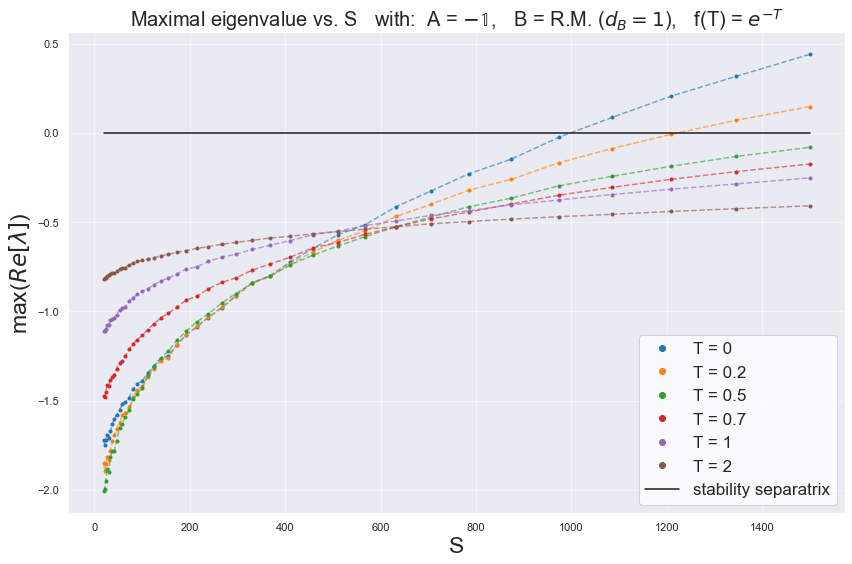

In [39]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

for j,T in enumerate(Tvec):
    plt.plot(Svec,EE[:,j],'.',color=colors[j],label=f'T = {T}')
    plt.plot(Svec,EE[:,j],'--',color=colors[j],alpha=0.6)

plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=1)

plt.title(r'Maximal eigenvalue vs. S $\ $ with:  A = $-\mathbb{1}$, $\ $ B = R.M. ($d_B=1$), $\ $ f(T) = $e^{-T}$',
          fontsize=20)
plt.grid(which="both",alpha=0.5)
plt.legend(fontsize=17,markerscale=2,loc='lower right',facecolor='w')

plt.xlabel('S',fontsize=23)
plt.ylabel('max($Re[\lambda]$)',fontsize=23)

    
fig.tight_layout()
plt.show(fig)
fig.savefig('final_figures/Maxeig_shift_ran_S1000_C0.4_s0.1.png',format='png')

In [ ]:
Class.d = 1
Class.C = 0.4
Class.sigma = 0.1
Class.S = 1000

Iterations = 30
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
Svec = [300,500,800,1000,1200,1500]
data = np.zeros((len(Svec),len(Tvec),Iterations))

for i,S in enumerate(Svec):
    print(S)
    Class.S = S
    for tt in range(Iterations):
        Class.ran_matrix()
        evlB = comp_eig(Class.M)
        for j,T in enumerate(Tvec):
            b = np.exp(-T)
            evl  = lambda_funct (-np.ones(Class.S),b*evlB,T)
            data[i,j,tt] = np.amax(evl.real)

In [34]:
#save('data_shift_FINAL_maxeig_T.npy', data)
data = load('data/data_shift_FINAL_maxeig_T.npy')
Std  = np.std(data,axis=2)
EE = np.mean(data,axis=2)
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
Svec = [300,500,800,1000,1200,1500]

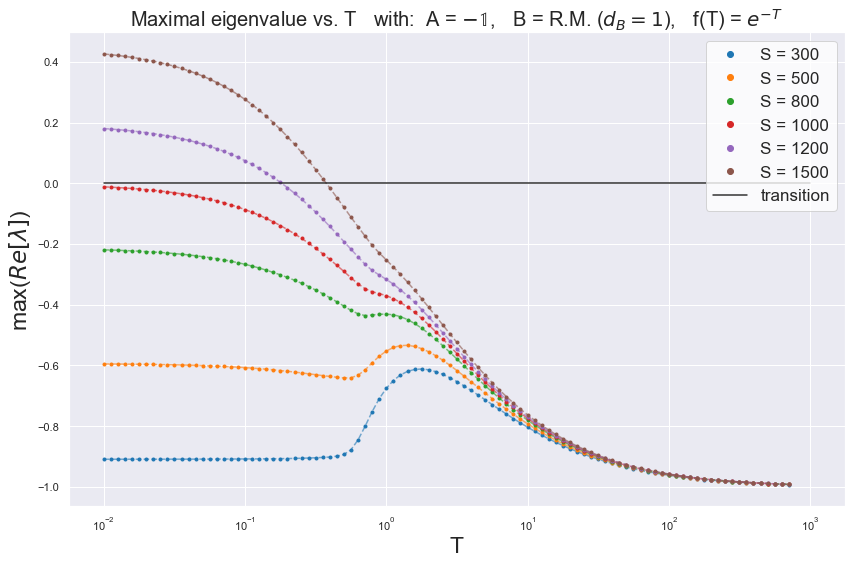

In [37]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

for j,S in enumerate(Svec):
    plt.plot(Tvec,EE[j,:],'.',color=colors[j],label=f'S = {S}')
    plt.plot(Tvec,EE[j,:],'--',color=colors[j],alpha=0.6)  

plt.plot(Tvec,np.zeros(len(Tvec)),'k-',label='transition',alpha=0.9)
plt.xscale('log')

plt.legend(fontsize=17,markerscale=2,loc='upper right',facecolor='w')
plt.xlabel('T',fontsize=23)
plt.ylabel('max($Re[\lambda]$)',fontsize=23)
plt.title(r'Maximal eigenvalue vs. T $\ $ with:  A = $-\mathbb{1}$, $\ $ B = R.M. ($d_B=1$), $\ $ f(T) = $e^{-T}$',
          fontsize=20)

fig.tight_layout()
plt.show(fig)
fig.savefig('final_figures/Maxeig_shift_T_ran_S1000_C0.4_s0.1.png',format='png')

## Different types of B matrices ($A=0$, $B=R.M.$)

In [8]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

complexity = sigma*np.sqrt(S*C)
Class = RMG(S,C,d,mu,sigma)

In [ ]:
Iterations = 10
I = np.vectorize(int)
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
funct = [Class.sym_matrix,Class.ran_matrix,Class.pp_matrix,Class.mix_matrix]
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        #print(S)
        Class.S = S
        for tt in range(Iterations):
            elem()
            for j,T in enumerate(Tvec[s]): 
                evl  = comp_eig_delay(0,Class.M,T)
                data[i,j,s,tt] = np.amax(evl.real)

In [9]:
#save('data.npy', data)
I = np.vectorize(int)
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
data = load('data.npy')

Std  = np.std(data[:,:,:,:],axis=3)
EE = np.mean(data[:,:,:,:],axis=3)

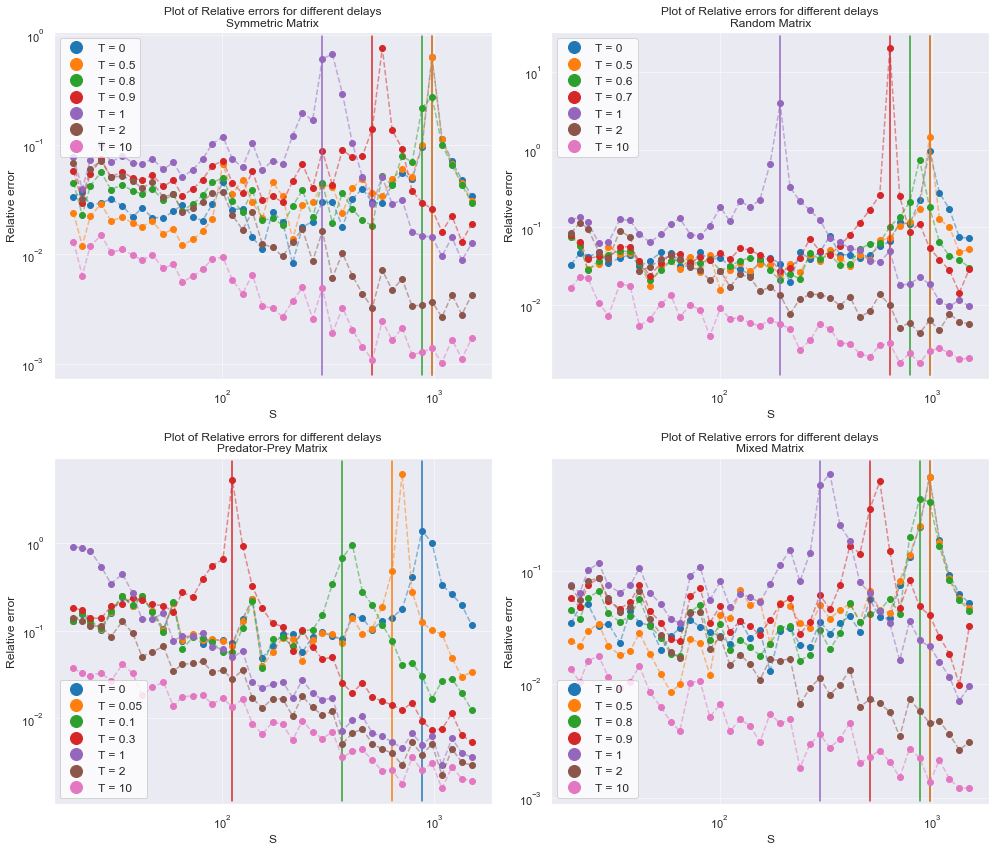

In [11]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        Rel_err = Std[:,j,s]/abs(EE[:,j,s])
        plt.plot(Svec,Rel_err,'o',color=colors[j],label=f'T = {T}')
        plt.plot(Svec,Rel_err,'--',color=colors[j],alpha=0.5)
        if not np.all(EE[:,j,s]>0):
            limval = Svec[EE[:,j,s]<0][-1]
            plt.axvline(limval,0.01,0.99,color=colors[j])
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('S',fontsize=12)
    plt.ylabel('Relative error',fontsize=12)
    plt.title("Plot of Relative errors for different delays\n"+Type[s])
    plt.grid(alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,facecolor='w')

fig.tight_layout()
plt.show(fig)

<ipython-input-15-dc5d01aecbba>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-15-dc5d01aecbba>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)
<ipython-input-15-dc5d01aecbba>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

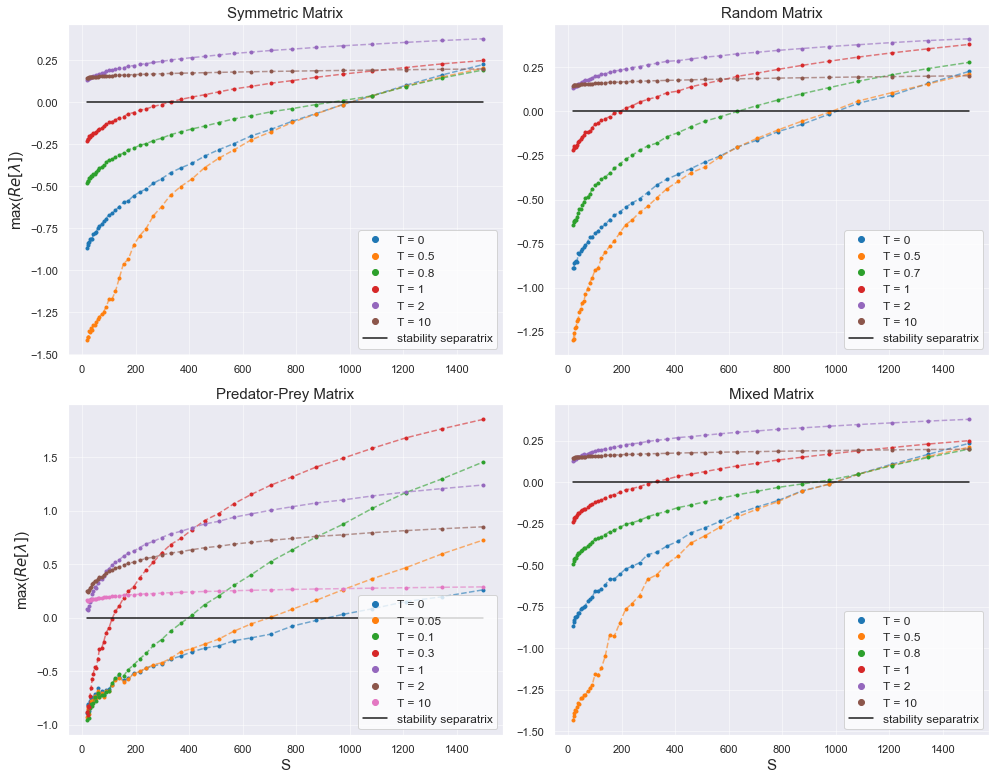

In [15]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,11)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    ccc=-1
    for j,T in enumerate(Tvec[s]):
        bo1 = j!=3 and s!=1
        bo2 = j!=2 and s==1
        if bo1 or bo2 or s==2:
            ccc +=1
            plt.plot(Svec,EE[:,j,s],'.',color=colors[ccc],label=f'T = {T}')
            plt.plot(Svec,EE[:,j,s],'--',color=colors[ccc],alpha=0.6)
  
    #plt.plot(Svec,sigma*np.sqrt(Svec*C)-Class.d,'k--')#,label='theory'
    plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=1)
    
    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,loc='lower right',facecolor='w')

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('S',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('S',fontsize=15)

    
fig.tight_layout()
plt.show(fig)
#fig.savefig('max_eig.png',format='png')

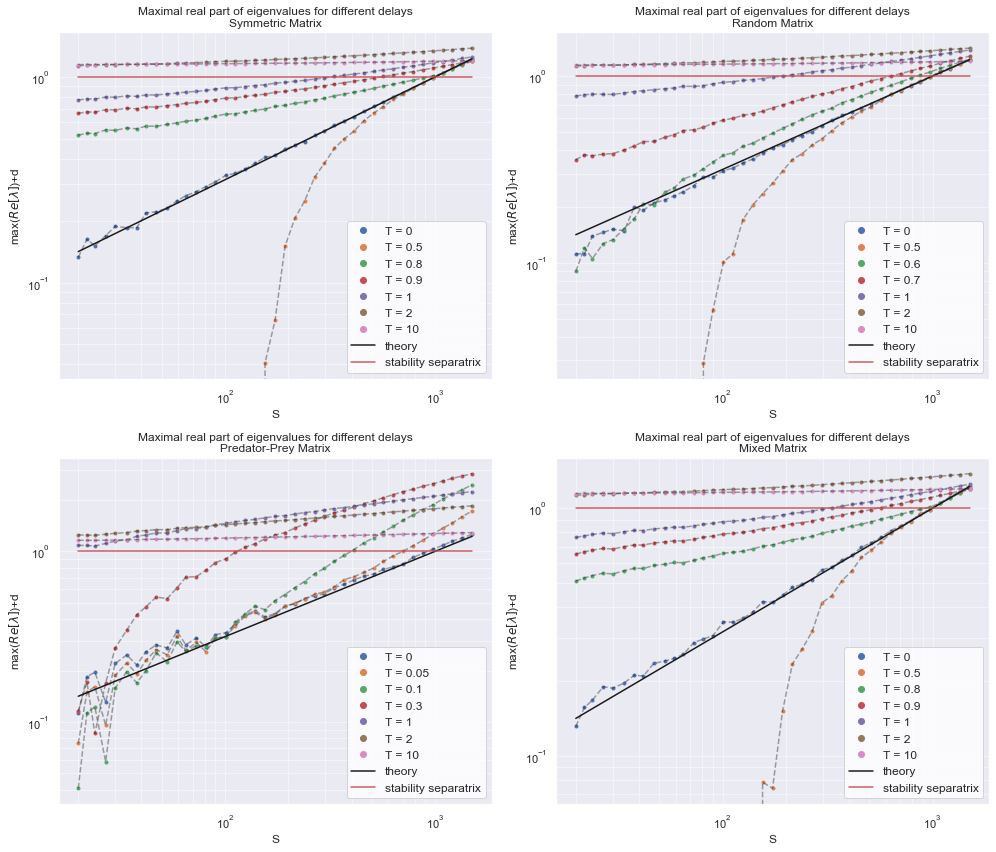

In [16]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
            plt.plot(Svec,EE[:,j,s]+Class.d,'.',label=f'T = {T}')
            plt.plot(Svec,EE[:,j,s]+Class.d,'k--',alpha=0.4)
       
    plt.plot(Svec,sigma*np.sqrt(Svec*C),'k-',label='theory')
    plt.plot(Svec,np.zeros(len(Svec))+Class.d,'r-',label='stability separatrix',alpha=0.9)
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('S',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)+d',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,loc='lower right',facecolor='w')

fig.tight_layout()
plt.show(fig)

## Eigenvalues sampled from their distribution (approximate but faster method)

## Max Re($\lambda$) vs S

In [18]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [19]:
Iterations = 100
I = np.vectorize(int)
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(2000),101))
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


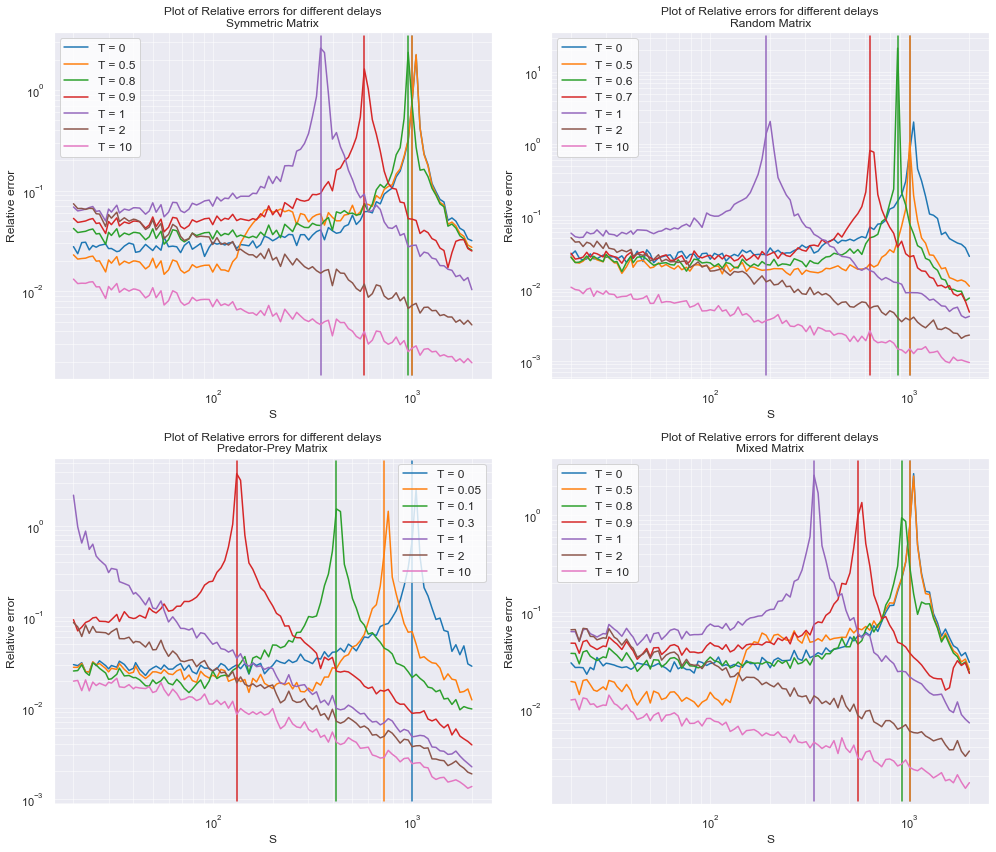

In [20]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        Rel_err = Std[:,j,s]/abs(EE[:,j,s])
        plt.plot(Svec,Rel_err,'-',color=colors[j],label=f'T = {T}')
        #plt.plot(Svec,Rel_err,'--',color=colors[j],alpha=0.5)
        if not np.all(EE[:,j,s]>0):
            limval = Svec[EE[:,j,s]<0][-1]
            plt.axvline(limval,0.01,0.99,color=colors[j])
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('S',fontsize=12)
    plt.ylabel('Relative error',fontsize=12)
    plt.title("Plot of Relative errors for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,facecolor='w')

fig.tight_layout()
plt.show(fig)

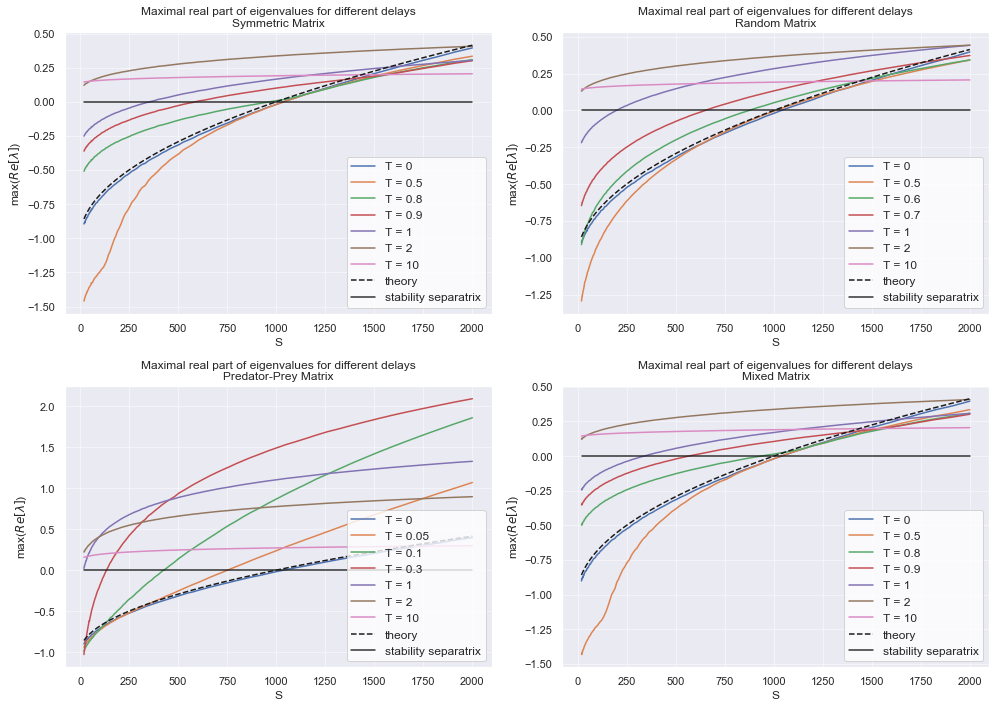

In [21]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(Svec,EE[:,j,s],'-',label=f'T = {T}')    
    plt.plot(Svec,sigma*np.sqrt(Svec*C)-1,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=0.9)
    
    plt.xlabel('S',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,loc='lower right',facecolor='w')

fig.tight_layout()
plt.show(fig)

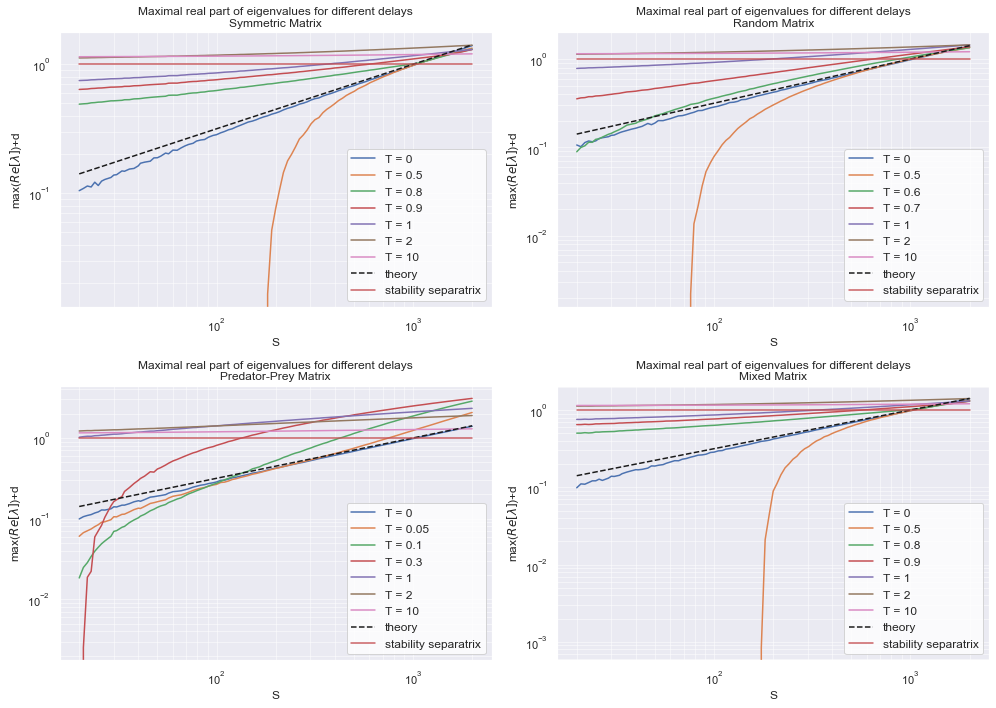

In [22]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(Svec,EE[:,j,s]+Class.d,'-',label=f'T = {T}') 
    plt.plot(Svec,sigma*np.sqrt(Svec*C),'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec))+Class.d,'r-',label='stability separatrix',alpha=0.9)
    
    plt.yscale('log')
    plt.xscale('log')   
    plt.xlabel('S',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)+d',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,loc='lower right',facecolor='w')

fig.tight_layout()
plt.show(fig)

### Try to fit using different 

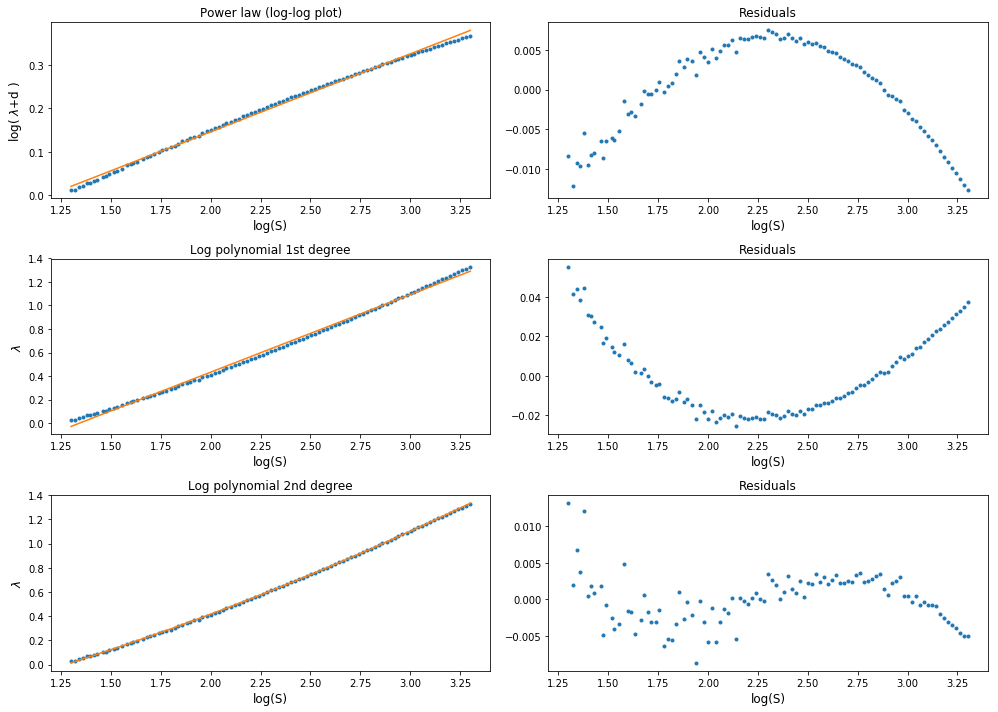

In [66]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

ee = EE[:,4,2]

p,cov = np.polyfit(np.log10(Svec),np.log10(ee+1),deg = 1,cov = True)
plt.subplot(3,2,1)
plt.plot(np.log10(Svec),np.log10(ee+1),'.')
plt.plot(np.log10(Svec),np.log10(Svec)*p[0]+p[1],'-')
plt.ylabel('log( $\lambda$+d )',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Power law (log-log plot)')
plt.subplot(3,2,2)
plt.plot(np.log10(Svec),np.log10(ee+1)-np.log10(Svec)*p[0]-p[1],'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log10(Svec),ee,deg = 1,cov = True)
plt.subplot(3,2,3)
plt.plot(np.log10(Svec),ee,'.')
plt.plot(np.log10(Svec),np.log10(Svec)*p[0]+p[1],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Log polynomial 1st degree')
plt.subplot(3,2,4)
plt.plot(np.log10(Svec),ee-np.log10(Svec)*p[0]-p[1],'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log10(Svec),ee,deg = 2,cov = True)
plt.subplot(3,2,5)
plt.plot(np.log10(Svec),ee,'.')
plt.plot(np.log10(Svec),np.log10(Svec)**2*p[0]+np.log10(Svec)*p[1]+p[2],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Log polynomial 2nd degree')
plt.subplot(3,2,6)
plt.plot(np.log10(Svec),ee-np.log10(Svec)**2*p[0]-np.log10(Svec)*p[1]-p[2],'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

fig.tight_layout()
plt.show(fig)

## Max Re($\lambda$) vs $\sigma$

In [67]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [68]:
Iterations = 100
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
sig_vec = 10**np.linspace(np.log10(0.005),np.log10(0.5),101)
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(sig_vec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    print(s)
    for i,Sig in enumerate(sig_vec):
        Class.sigma = Sig*sig[s]
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


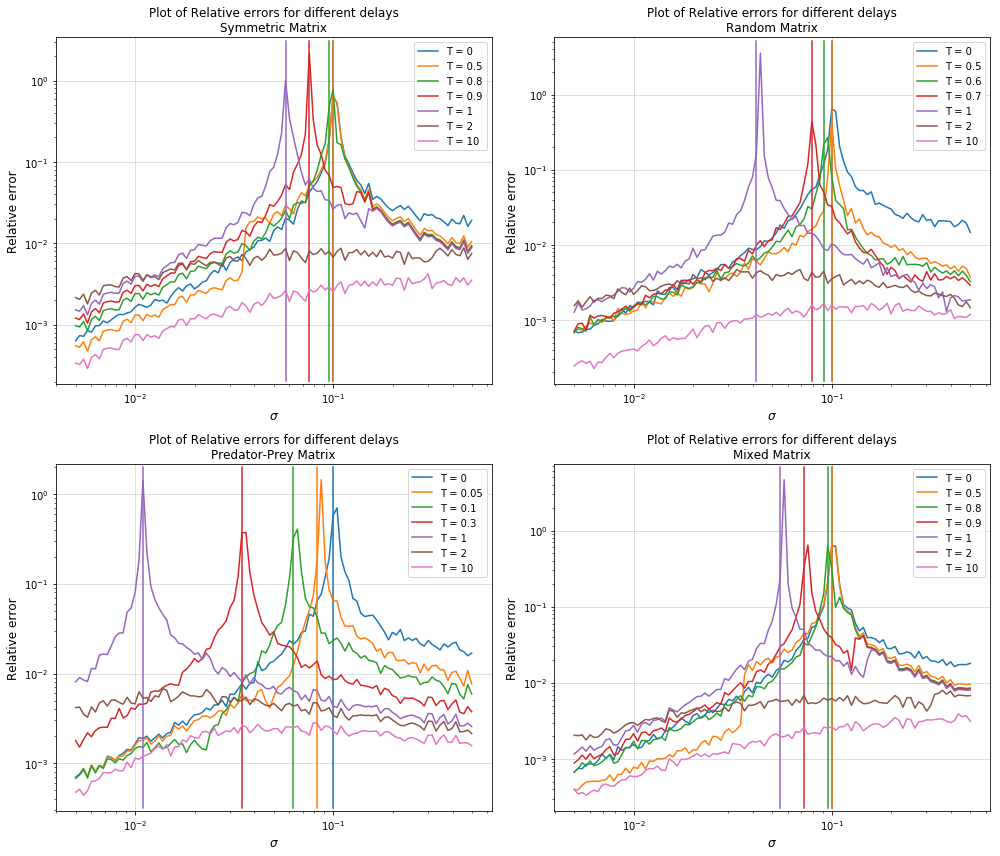

In [69]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        Rel_err = Std[:,j,s]/abs(EE[:,j,s])
        plt.plot(sig_vec,Rel_err,'-',color=colors[j],label=f'T = {T}')
        #plt.plot(Svec,Rel_err,'--',color=colors[j],alpha=0.5)
        if not np.all(EE[:,j,s]>0):
            limval = sig_vec[EE[:,j,s]<0][-1]
            plt.axvline(limval,0.01,0.99,color=colors[j])
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$\sigma$',fontsize=12)
    plt.ylabel('Relative error',fontsize=12)
    plt.title("Plot of Relative errors for different delays\n"+Type[s])
    plt.grid(alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

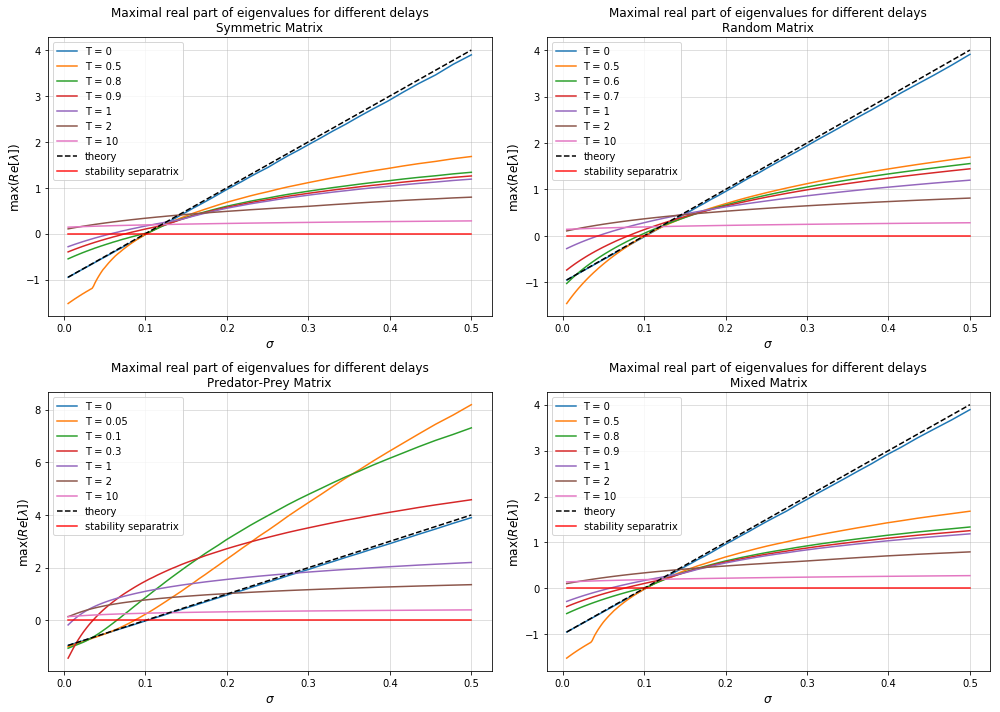

In [70]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(sig_vec,EE[:,j,s],'-',label=f'T = {T}')      
    plt.plot(sig_vec,sig_vec*np.sqrt(S*C)-Class.d,'k--',label='theory')
    plt.plot(sig_vec,np.zeros(len(sig_vec)),'r-',label='stability separatrix',alpha=0.9)
    
    plt.xlabel('$\sigma$',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

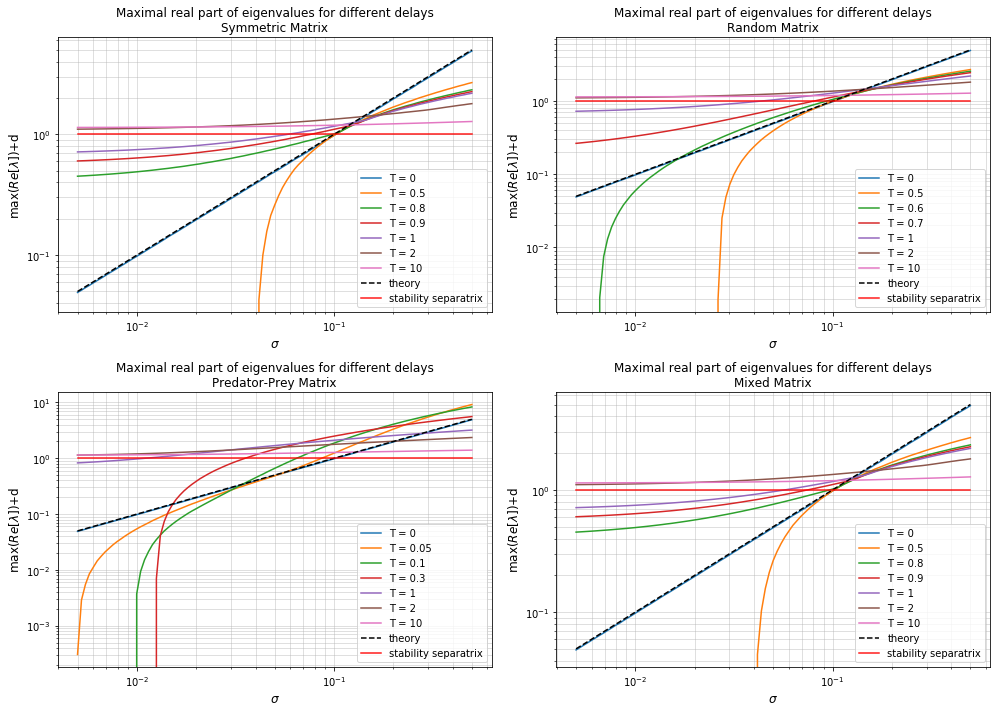

In [72]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(sig_vec,EE[:,j,s]+Class.d,'-',label=f'T = {T}')  
    plt.plot(sig_vec,sig_vec*np.sqrt(S*C),'k--',label='theory')
    plt.plot(sig_vec,np.zeros(len(sig_vec))+1,'r-',label='stability separatrix',alpha=0.9)
    
    plt.yscale('log')
    plt.xscale('log')   
    plt.xlabel('$\sigma$',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)+d',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

## Max Re($\lambda$) vs C

In [74]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [75]:
Iterations = 100
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
C_vec = 10**np.linspace(np.log10(0.005),np.log10(0.5),101)
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(C_vec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    print(s)
    for i,Con in enumerate(C_vec):
        Class.sigma = 0.1*sig[s]
        Class.C = Con
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


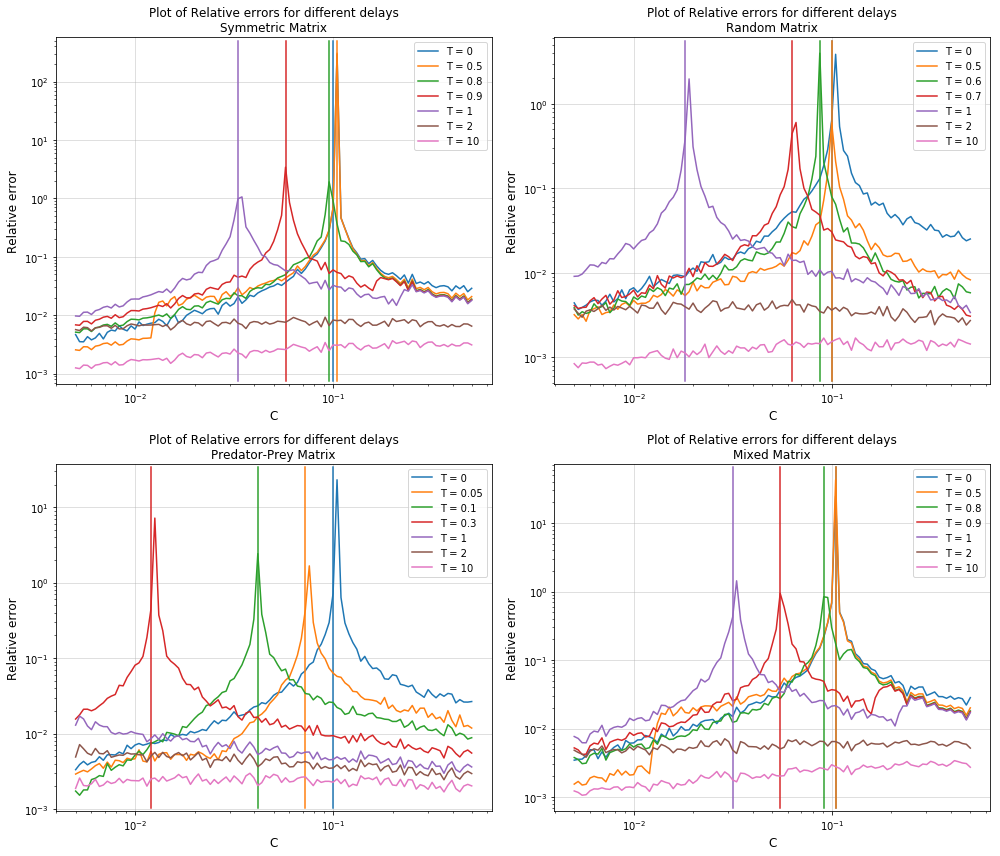

In [76]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        Rel_err = Std[:,j,s]/abs(EE[:,j,s])
        plt.plot(C_vec,Rel_err,'-',color=colors[j],label=f'T = {T}')
        #plt.plot(Svec,Rel_err,'--',color=colors[j],alpha=0.5)
        if not np.all(EE[:,j,s]>0):
            limval = C_vec[EE[:,j,s]<0][-1]
            plt.axvline(limval,0.01,0.99,color=colors[j])
    
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('C',fontsize=12)
    plt.ylabel('Relative error',fontsize=12)
    plt.title("Plot of Relative errors for different delays\n"+Type[s])
    plt.grid(alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

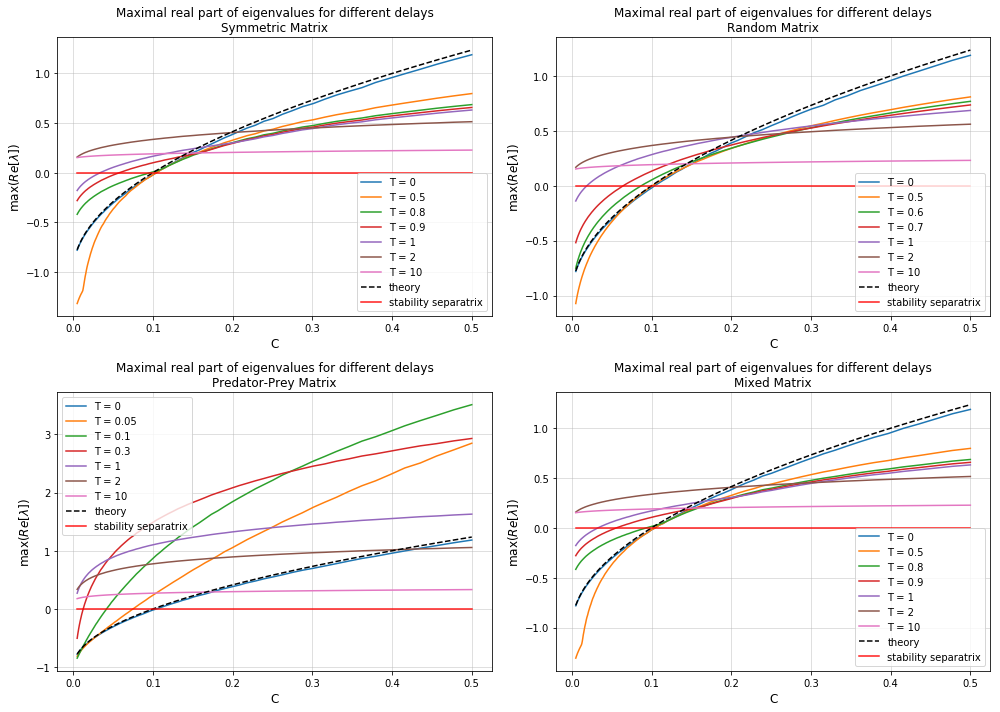

In [77]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(C_vec,EE[:,j,s],'-',label=f'T = {T}')        
    plt.plot(C_vec,sigma*np.sqrt(S*C_vec)-Class.d,'k--',label='theory')
    plt.plot(C_vec,np.zeros(len(C_vec)),'r-',label='stability separatrix',alpha=0.9)
    
    plt.xlabel('C',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

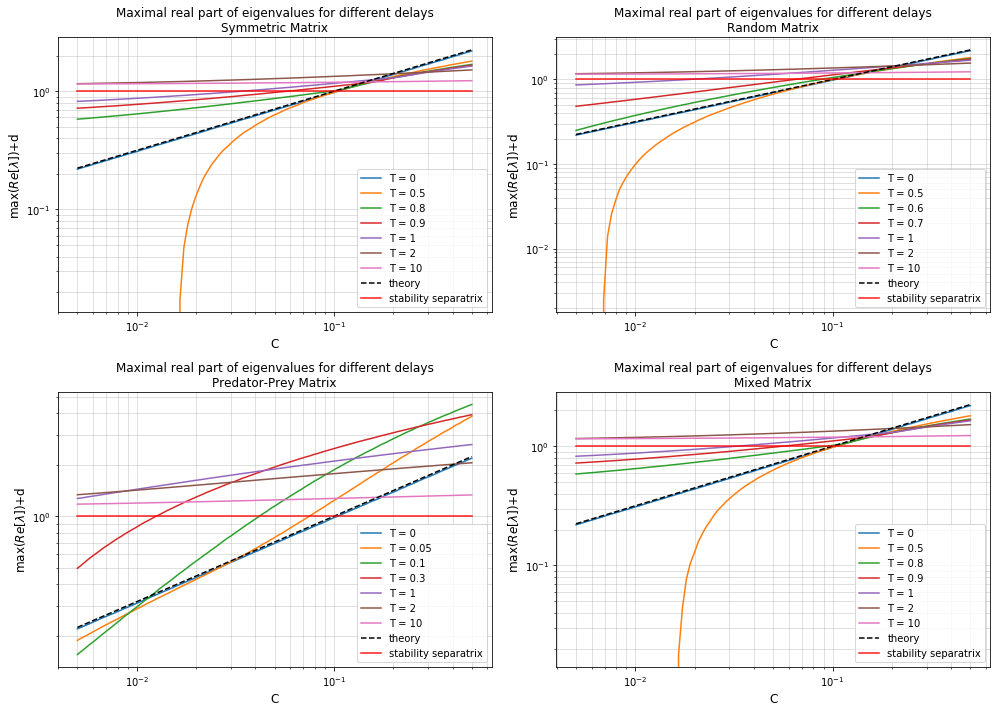

In [79]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(C_vec,EE[:,j,s]+Class.d,'-',label=f'T = {T}')  
    plt.plot(C_vec,sigma*np.sqrt(S*C_vec),'k--',label='theory')
    plt.plot(C_vec,np.zeros(len(C_vec))+1,'r-',label='stability separatrix',alpha=0.9)
    
    plt.yscale('log')
    plt.xscale('log')   
    plt.xlabel('C',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)+d',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

## Max Re($\lambda$) vs T

In [23]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [11]:
Iterations = 30
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
#[np.linspace(0,3,101),np.linspace(0,3,101),np.concatenate((np.linspace(0,0.5,51),np.linspace(0.55,3,50)),axis=0),np.linspace(0,3,101)]
Svec = [500,800,1000,1200,1500]
funct = [Class.sym_matrix,Class.ran_matrix,Class.pp_matrix,Class.mix_matrix]
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),len(Tvec),4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            elem()
            evlB = comp_eig(Class.M)
            for j,T in enumerate(Tvec): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


In [30]:
from numpy import save,load
#save('data_delay_T.npy', data)
Tvec = 10**np.linspace(np.log10(0.01),np.log10(1000),101)
Svec = [500,800,1000,1200,1500]
data = load('data_delay_T.npy')
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

<ipython-input-32-ef6c4914b49f>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-32-ef6c4914b49f>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)
<ipython-input-32-ef6c4914b49f>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

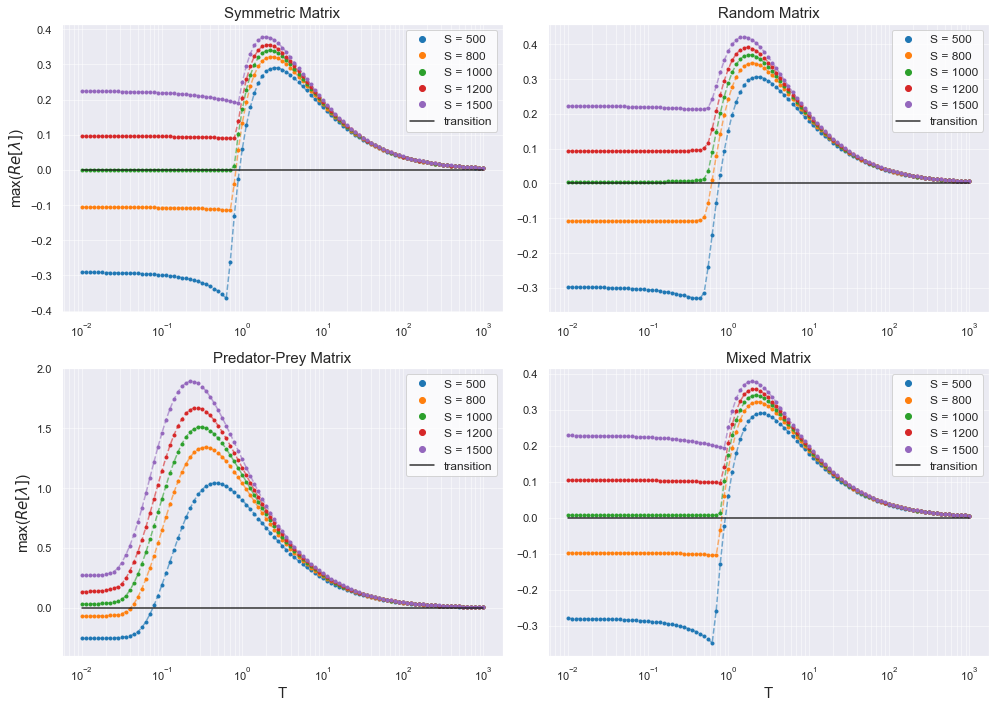

In [32]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,S in enumerate(Svec):
        plt.plot(Tvec,EE[j,:,s],'.',color=colors[j],label=f'S = {S}')
        plt.plot(Tvec,EE[j,:,s],'--',color=colors[j],alpha=0.6)  
        #plt.plot(Tvec[s],EE[j,:,s],'-',label=f'S = {S}')        
        plt.plot(sigma*np.sqrt(S*C)-Class.d,'k.')
    plt.plot(Tvec,np.zeros(len(Tvec)),'k-',label='transition',alpha=0.9)
    plt.xscale('log')

    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,loc='upper right',facecolor='w')

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('T',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('T',fontsize=15)

    
fig.tight_layout()
plt.show(fig)
#fig.savefig('max_eig_T.png',format='png')

### Maximal Re($\lambda$) for different S : $A= -\mathbb{1}$, $B=R.M.\ (d=0)$

In [25]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 0          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

Iterations = 10
I = np.vectorize(int)
Tvec = [[0.5,1,2,5],[0.5,1,2,5],[0.05,0.1,0.3,1,2,10],[0.5,1,2,5]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
funct = [Class.sym_matrix,Class.ran_matrix,Class.pp_matrix,Class.mix_matrix]
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        #print(S)
        Class.S = S
        for tt in range(Iterations):
            elem()
            for j,T in enumerate(Tvec[s]): 
                evl  = comp_eig_delay(- np.eye(Class.S),Class.M,T)
                data[i,j,s,tt] = np.amax(evl.real)

0
1
2
3


In [28]:
Tvec = [[0.5,1,2,5],[0.5,1,2,5],[0.05,0.1,0.3,1,2,10],[0.5,1,2,5]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))
#save('data_delay_A.npy', data)
data = load('data_delay_A.npy')

In [29]:
Std  = np.std(data[:,:,:,:],axis=3)
EE = np.mean(data[:,:,:,:],axis=3)

<ipython-input-31-1e12efbac865>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,1)
<ipython-input-31-1e12efbac865>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,3)
<ipython-input-31-1e12efbac865>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

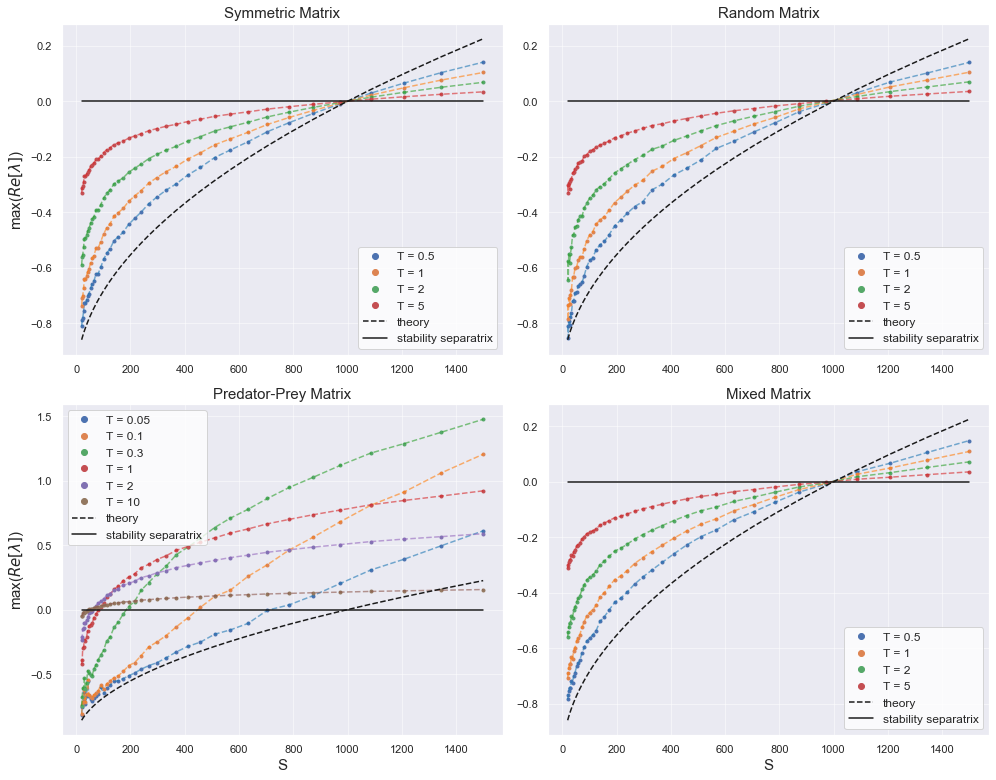

In [31]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,11)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
            plt.plot(Svec,EE[:,j,s],'.',label=f'T = {T}')
            plt.plot(Svec,EE[:,j,s],'--',color=colors[j],alpha=0.6)
  
    plt.plot(Svec,sigma*np.sqrt(Svec*C)-1,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=1)
    
    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12,markerscale=2,facecolor='w')

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('S',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('S',fontsize=15)

    
fig.tight_layout()
plt.show(fig)

# Eigenvalue shift: delay-dependent Random matrix


$$\lambda\vec{v} = \big(A-c_1\mathbb{1}+e^{-c_2 T}\cdot B e^{-\lambda T}\big)\vec{v}$$

### $B=R.M.\ (d=0)$

In [7]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 0          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [ ]:
Iterations = 10
I = np.vectorize(int)
Tvec = [[0,0.1,0.5,1,10],[0,0.1,0.5,1,10],[0,0.05,0.1,0.3,1,2,10],[0,0.1,0.5,1,10]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(1500),41))#I(10**np.linspace(np.log10(20.1),np.log10(3000),101))
funct = [Class.sym_matrix,Class.ran_matrix,Class.pp_matrix,Class.mix_matrix]#funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            elem()#evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]):
                a = -1.
                b = np.exp(a*T)
                evl=0
                if T == 0:
                    evl  = comp_eig_delay(0,a*np.eye(Class.S) + Class.M,T)#lambda_funct (0,a+evlB,T)
                else:
                    evl  = comp_eig_delay(a*np.eye(Class.S),b*Class.M,T)#lambda_funct (a*np.ones(evlB.shape[0]),b*evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

In [10]:
from numpy import save,load
#save('data_shifted.npy', data)

/home/damiano/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


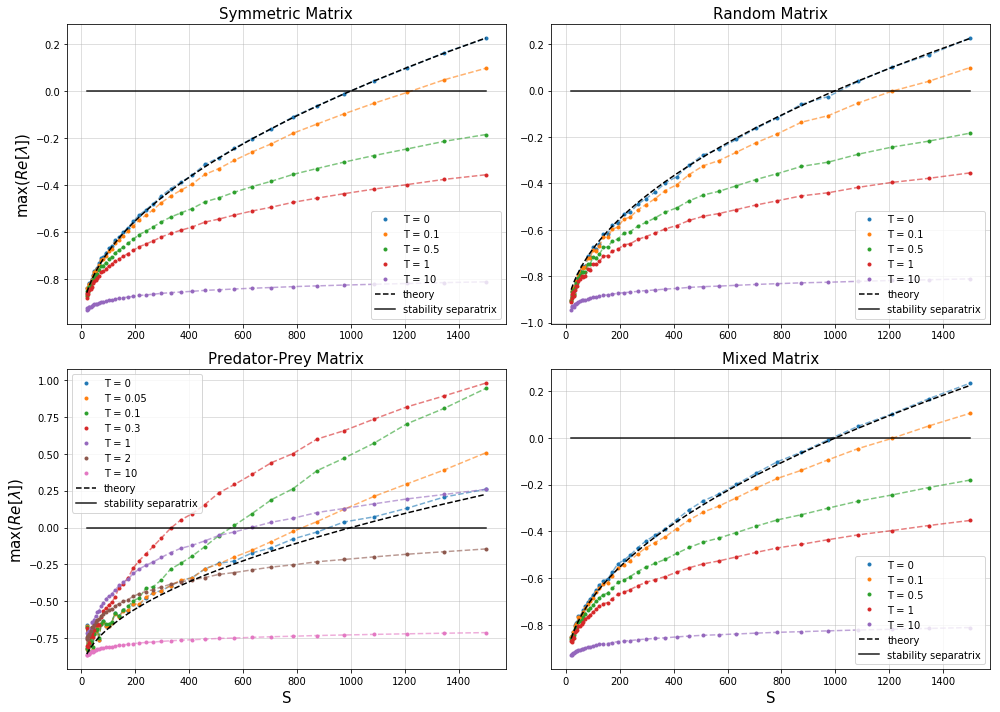

In [9]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(Svec,EE[:,j,s],'.',label=f'T = {T}')
        plt.plot(Svec,EE[:,j,s],'--',color=colors[j],alpha=0.6)
  
    plt.plot(Svec,sigma*np.sqrt(Svec*C)-1,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec)),'k-',label='stability separatrix',alpha=0.9)
    
    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=10)

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('S',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('S',fontsize=15)

fig.tight_layout()
plt.show(fig)

In [31]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 0          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [32]:
Iterations = 100
I = np.vectorize(int)
Tvec = 10**np.linspace(np.log10(0.01),np.log10(100),201)#np.linspace(0,3,101)
Svec = [500,800,1000,1200,1500]
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),len(Tvec),4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec):
                a = -1.
                b = np.exp(a*T)
                evl  = lambda_funct (a*np.ones(evlB.shape[0]),b*evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


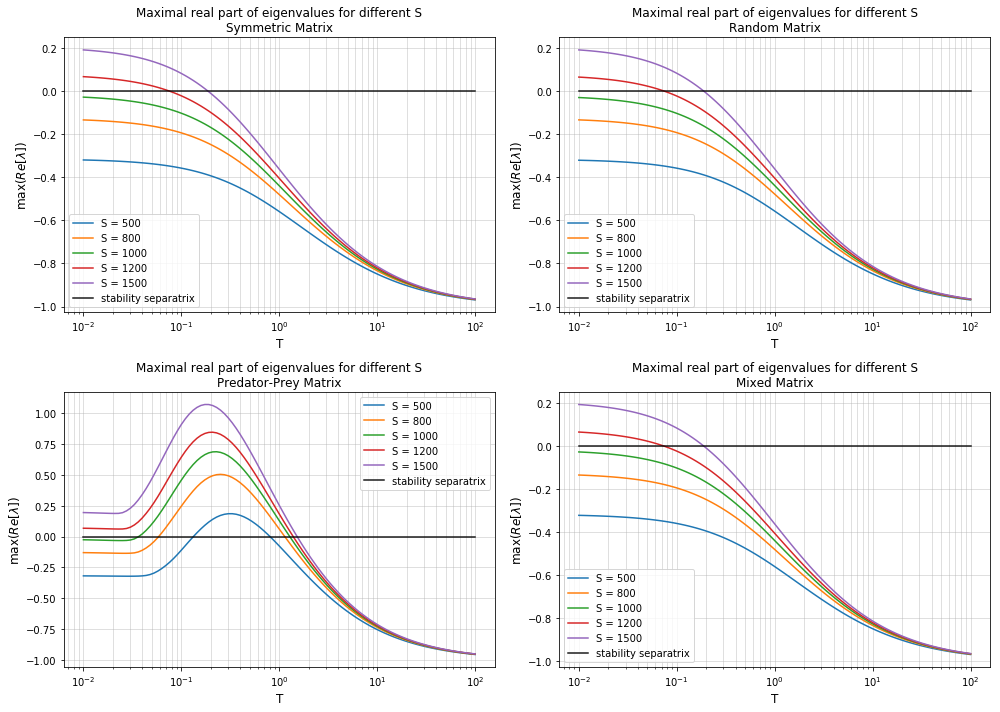

In [35]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,S in enumerate(Svec):
        plt.plot(Tvec,EE[j,:,s],'-',label=f'S = {S}')        
        #plt.plot(sigma*np.sqrt(S*C)-Class.d,'k.')
    plt.plot(Tvec,np.zeros(len(Tvec)),'k-',label='stability separatrix',alpha=0.9)
    
    plt.xscale('log')
    plt.xlabel('T',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different S\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

# Max Eigenvalue in the limit $S\rightarrow \infty$

In [7]:
S = 1000         #species - shape matrix
C = 0.1      #connectance
d = 1            #diagonal elements
mu = 0           #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [8]:
Iterations = 100
I = np.vectorize(int)
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
Svec = I(10**np.linspace(np.log10(100.1),np.log10(10000),101))
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten

for s,elem in enumerate(funct):
    Class.sigma = sigma*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)

0
1
2
3


### sigma = 1, C = 0.5

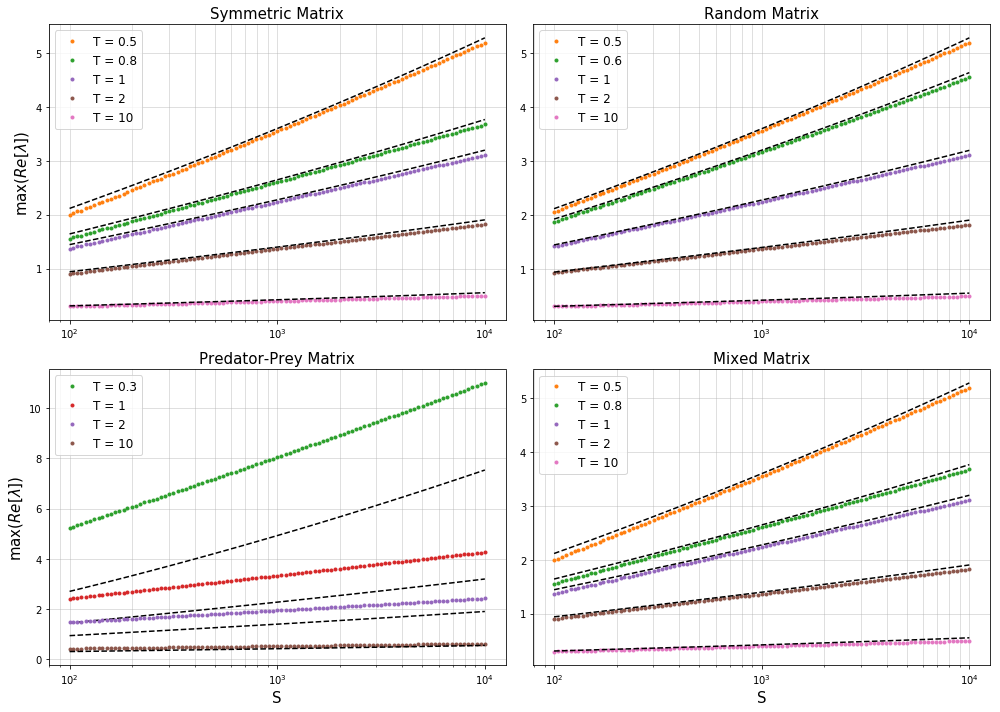

In [86]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        boll = s==2 and j==1
        boll1 = s!=2 and j==3
        if j!=0 and not boll and not boll1:
            plt.plot(Svec,EE[:,j,s],'.',color=colors[j],label=f'T = {T}')
            bmax = -d + sigma*np.sqrt(C*Svec)
            #plt.plot(Svec,(np.log(-d*T+sigma*T*sig[s]*np.sqrt(C*Svec))-np.log(np.log(-d*T+sigma*T*sig[s]*np.sqrt(C*Svec))))/T,'.',color=colors[j]) 
            phi = np.log(1+np.sqrt(2*np.e*bmax*T+2))
            log_approx = (-1 + phi + phi**2/6 - phi**3/72 - phi**4*7/2160 + phi**5*7/5760)/T
            #log_approx = sp.special.lambertw(bmax*T)/T
            plt.plot(Svec,log_approx,'k--') 
    #plt.plot(Svec,sigma*np.sqrt(Svec*C)-Class.d,'k--',label='theory')
    #plt.yscale('log')
    plt.xscale('log')   
    #plt.xlabel('S',fontsize=15)
    #plt.ylabel('max($Re[\lambda]$)',fontsize=15)
    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12)

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('S',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('S',fontsize=15)

    
fig.tight_layout()
plt.show(fig)

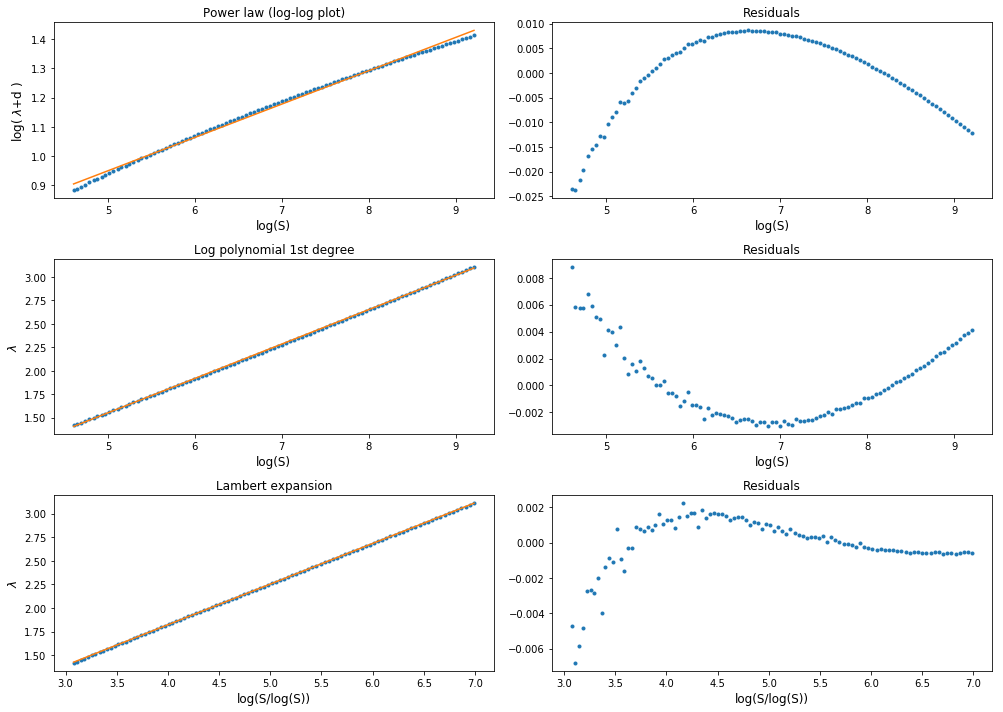

In [90]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

ee = EE[:,4,1]

p,cov = np.polyfit(np.log(Svec),np.log(ee+1),deg = 1,cov = True)
plt.subplot(3,2,1)
plt.plot(np.log(Svec),np.log(ee+1),'.')
plt.plot(np.log(Svec),np.log(Svec)*p[0]+p[1],'-')
plt.ylabel('log( $\lambda$+d )',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Power law (log-log plot)')
plt.subplot(3,2,2)
plt.plot(np.log(Svec),(np.log(ee+1)-np.log(Svec)*p[0]-p[1])/np.log(ee+1),'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log(Svec),ee,deg = 1,cov = True)
plt.subplot(3,2,3)
plt.plot(np.log(Svec),ee,'.')
plt.plot(np.log(Svec),np.log(Svec)*p[0]+p[1],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Log polynomial 1st degree')
plt.subplot(3,2,4)
plt.plot(np.log(Svec),(ee-np.log(Svec)*p[0]-p[1])/ee,'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log(Svec/np.log(Svec)),ee,deg = 1,cov = True)
plt.subplot(3,2,5)
plt.plot(np.log(Svec/np.log(Svec)),ee,'.')
plt.plot(np.log(Svec/np.log(Svec)),np.log(Svec/np.log(Svec))*p[0]+p[1],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S/log(S))',fontsize=12)
plt.title('Lambert expansion')
plt.subplot(3,2,6)
plt.plot(np.log(Svec/np.log(Svec)),(ee-np.log(Svec/np.log(Svec))*p[0]-p[1])/ee,'.')
plt.xlabel('log(S/log(S))',fontsize=12)
plt.title('Residuals')

fig.tight_layout()
plt.show(fig)

### Near the transition point: $C = 0.1$ $\sigma = 0.1$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in sqrt


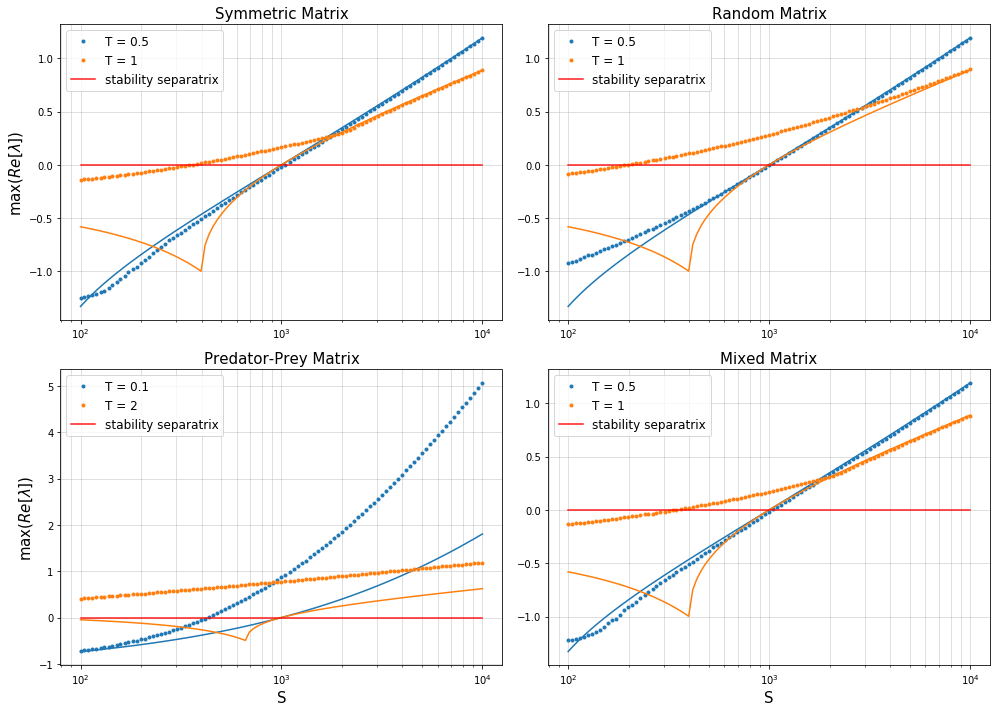

In [14]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    aa=0
    for j,T in enumerate(Tvec[s]):
        if j==1 or j==4:
            plt.plot(Svec,EE[:,j,s],'.',color=colors[aa],label=f'T = {T}')
            bmax = -d + sigma*np.sqrt(C*Svec)
            #1
            #ind = bmax > 0
            #bmax1 = bmax[ind]
            #approx = (np.log(bmax1*T) - np.log(np.log(bmax1*T))*(1 - 1/np.log(bmax1*T)))/T
            #plt.plot(Svec[ind],approx,'--',color=colors[j])
            #2
            #ind = Svec < 5000
            #bmax1 = bmax[ind]
            phi = np.log(1+np.sqrt(2*np.e*bmax*T+2))
            #log_approx = (-1 + phi + phi**2/6 - phi**3/72 - phi**4*7/2160 + phi**5*7/5760)/T
            log_approx = sp.special.lambertw(bmax*T)/T
            plt.plot(Svec,log_approx,'-',color=colors[aa])
            aa += 1
    #plt.plot(Svec,sigma*np.sqrt(Svec*C)-Class.d,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec)),'r-',label='stability separatrix',alpha=0.9)
    #plt.yscale('log')
    plt.xscale('log')   
    plt.title(Type[s],fontsize=15)
    plt.grid(which="both",alpha=0.5)
    plt.legend(fontsize=12)

plt.subplot(2,2,1)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,3)
plt.xlabel('S',fontsize=15)
plt.ylabel('max($Re[\lambda]$)',fontsize=15)
plt.subplot(2,2,4)
plt.xlabel('S',fontsize=15)

fig.tight_layout()
plt.show(fig)

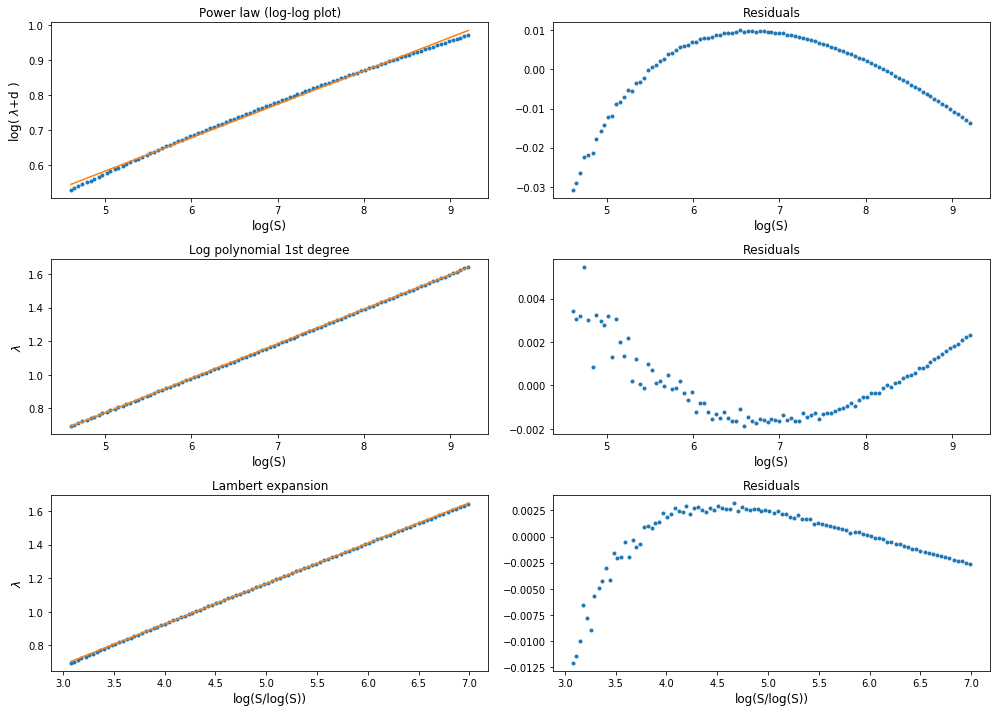

In [142]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

ee = EE[:,4,1]

p,cov = np.polyfit(np.log(Svec),np.log(ee+1),deg = 1,cov = True)
plt.subplot(3,2,1)
plt.plot(np.log(Svec),np.log(ee+1),'.')
plt.plot(np.log(Svec),np.log(Svec)*p[0]+p[1],'-')
plt.ylabel('log( $\lambda$+d )',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Power law (log-log plot)')
plt.subplot(3,2,2)
plt.plot(np.log(Svec),(np.log(ee+1)-np.log(Svec)*p[0]-p[1])/np.log(ee+1),'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log(Svec),ee,deg = 1,cov = True)
plt.subplot(3,2,3)
plt.plot(np.log(Svec),ee,'.')
plt.plot(np.log(Svec),np.log(Svec)*p[0]+p[1],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S)',fontsize=12)
plt.title('Log polynomial 1st degree')
plt.subplot(3,2,4)
plt.plot(np.log(Svec),(ee-np.log(Svec)*p[0]-p[1])/ee,'.')
plt.xlabel('log(S)',fontsize=12)
plt.title('Residuals')

p,cov = np.polyfit(np.log(Svec/np.log(Svec)),ee,deg = 1,cov = True)
plt.subplot(3,2,5)
plt.plot(np.log(Svec/np.log(Svec)),ee,'.')
plt.plot(np.log(Svec/np.log(Svec)),np.log(Svec/np.log(Svec))*p[0]+p[1],'-')
plt.ylabel('$\lambda$',fontsize=12)
plt.xlabel('log(S/log(S))',fontsize=12)
plt.title('Lambert expansion')
plt.subplot(3,2,6)
plt.plot(np.log(Svec/np.log(Svec)),(ee-np.log(Svec/np.log(Svec))*p[0]-p[1])/ee,'.')
plt.xlabel('log(S/log(S))',fontsize=12)
plt.title('Residuals')

fig.tight_layout()
plt.show(fig)

# S vs. T phase transitions

In [32]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

complexity = sigma*np.sqrt(S*C)
Class = RMG(S,C,d,mu,sigma)

In [ ]:
Iterations = 1
I = np.vectorize(int)
Tvec = np.linspace(0,2,101)
funct = [Class.sym_matrix,Class.ran_matrix,Class.pp_matrix,Class.mix_matrix]#funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
Svec = np.zeros((len(Tvec),4))

Sval = 1010
for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,T in enumerate(Tvec):
        print(i/100)
        evl = 0
        if i == 0:
            Sval = 1005
        else:
            Sval = Svec[i-1,s]+1
        while evl >= 0:
            Class.S = int(Sval)
            evl = 0
            for tt in range(Iterations):
                elem() 
                ee  = comp_eig_delay(0,Class.M,T)
                evl += np.amax(ee.real)/Iterations
            Sval = Sval-1
            if Sval < 2:
                break
        Svec[i,s] = Sval+1

In [44]:
Iterations = 100
I = np.vectorize(int)
Tvec = np.linspace(0,2,201)
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
Svec = np.zeros((len(Tvec),4))

Sval = 1010
for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,T in enumerate(Tvec):
        evl = 0
        if i == 0:
            Sval = 1020
        else:
            Sval = Svec[i-1,s]
        while evl >= 0:
            Class.S = Sval
            evl = 0
            for tt in range(Iterations):
                evlB = Class.generate_eigenvalues(mat=elem)
                ee = lambda_funct (0,evlB,T)
                evl += np.amax(ee.real)/Iterations
            Sval = Sval-1
            if Sval < 2:
                break
        Svec[i,s] = Sval+1

0
1
2
3


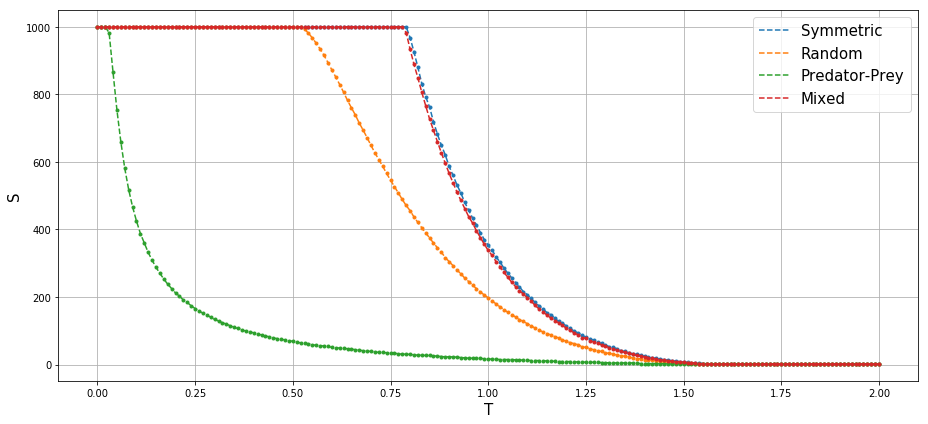

In [45]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

ty = ['Symmetric','Random','Predator-Prey','Mixed']
for s in range(4):
    ind = Svec[:,s] > 1000
    AA = Svec[:,s]
    AA[ind] = 1000
    plt.plot(Tvec,AA,'.',color=colors[s])
    plt.plot(Tvec,AA,'--',color=colors[s],label=ty[s])
#plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=12,markerscale=2,facecolor='w')
plt.grid()
fig.tight_layout()
plt.show(fig)

In [ ]:
Iterations = 100
Class.d = 0
I = np.vectorize(int)
Tvec = np.linspace(0.02,2,200)
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
Svec = np.zeros((len(Tvec),4))

Sval = 1010
for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,T in enumerate(Tvec):
        a = -1.
        b = 1/(T+1)#1/(T+1)#np.exp(a*T)
        evl = 0
        bol = s==2 and T>=0.5
        if s!=2 or bol :
            if i == 0:
                Sval = 1010
            else:
                Sval = Svec[i-1,s]
            while evl <= 0:
                Class.S = Sval
                evl = 0
                for tt in range(Iterations):
                    evlB = Class.generate_eigenvalues(mat=elem)
                    ee = lambda_funct (a*np.ones(evlB.shape[0]),b*evlB,T)
                    evl += np.amax(ee.real)/Iterations
                Sval = Sval+10
                if Sval >5100:
                    break
            Svec[i,s] = Sval - 10
        else:# s==2:
            if i == 0:
                Sval = 1010
            else:
                Sval = Svec[i-1,s]+5
            while evl >= 0:
                Class.S = Sval
                evl = 0
                for tt in range(Iterations):
                    evlB = Class.generate_eigenvalues(mat=elem)
                    ee = lambda_funct (a*np.ones(evlB.shape[0]),b*evlB,T)
                    evl += np.amax(ee.real)/Iterations
                Sval = Sval-1
            Svec[i,s] = Sval+1

### $f(T)=1/(1+T)$

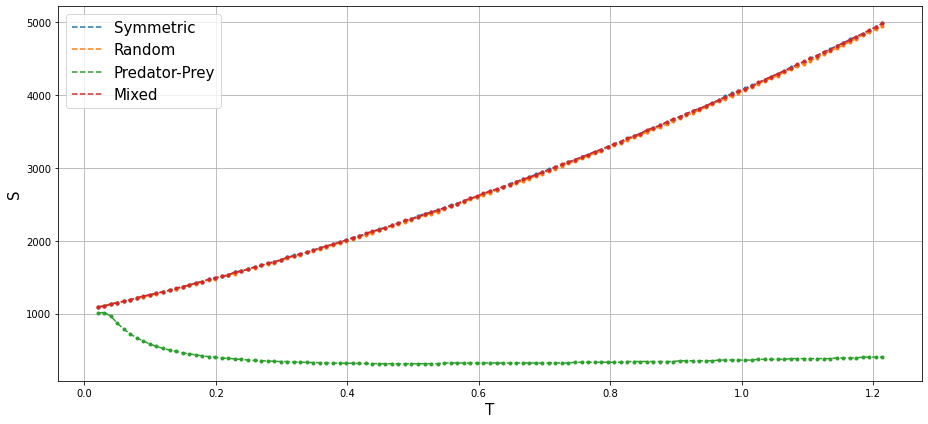

In [12]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

ty = ['Symmetric','Random','Predator-Prey','Mixed']
for s in range(4):
    #ind= Svec[:,s]<5000
    plt.plot(Tvec[ind],Svec[:,s][ind],'.',color=colors[s])
    plt.plot(Tvec[ind],Svec[:,s][ind],'--',color=colors[s],label=ty[s])

#plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=12,markerscale=2,facecolor='w')
plt.grid()
fig.tight_layout()
plt.show(fig)

In [ ]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

ty = ['Symmetric','Random','Predator-Prey','Mixed']
for s in range(4):
    #ind= Svec[:,s]<5000
    plt.plot(Tvec[ind],Svec[:,s][ind],'.',color=colors[s])
    plt.plot(Tvec[ind],Svec[:,s][ind],'--',color=colors[s],label=ty[s])

plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=12,markerscale=2,facecolor='w')
plt.grid()
fig.tight_layout()
plt.show(fig)

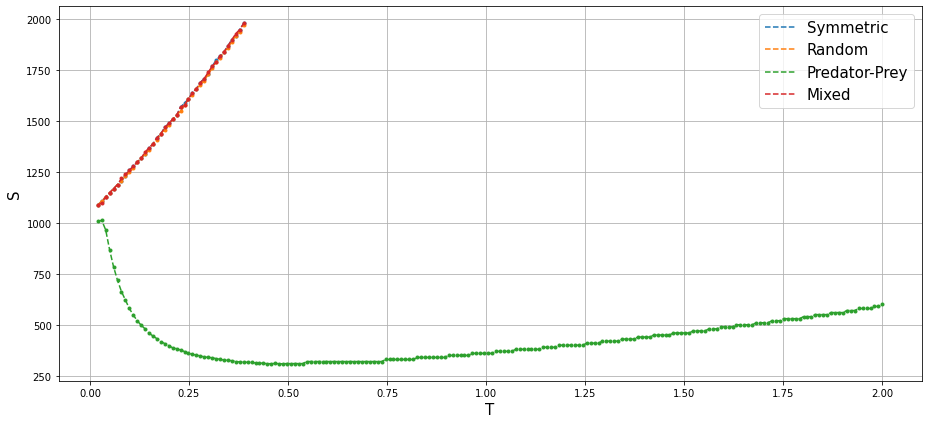

In [14]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

ty = ['Symmetric','Random','Predator-Prey','Mixed']
for s in range(4):
    ind= Svec[:,s]<2000
    plt.plot(Tvec[ind],Svec[:,s][ind],'.',color=colors[s])
    plt.plot(Tvec[ind],Svec[:,s][ind],'--',color=colors[s],label=ty[s])

#plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=15)
plt.grid()
fig.tight_layout()
plt.show(fig)

### $f(T)=e^{-T}$

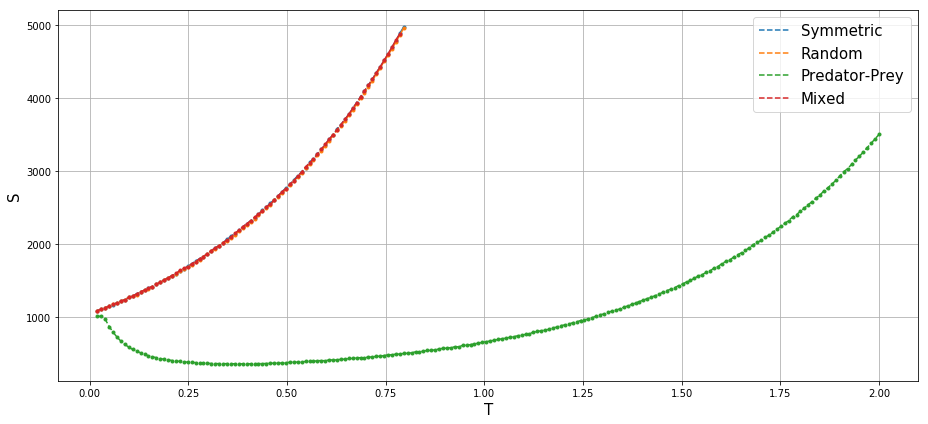

In [47]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

for s in range(4):
    ind= Svec[:,s]<5000
    plt.plot(Tvec[ind],Svec[:,s][ind],'.',color=colors[s])
    plt.plot(Tvec[ind],Svec[:,s][ind],'--',color=colors[s],label=ty[s])

#plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=12,markerscale=2,facecolor='w')
plt.grid()
fig.tight_layout()
plt.show(fig)

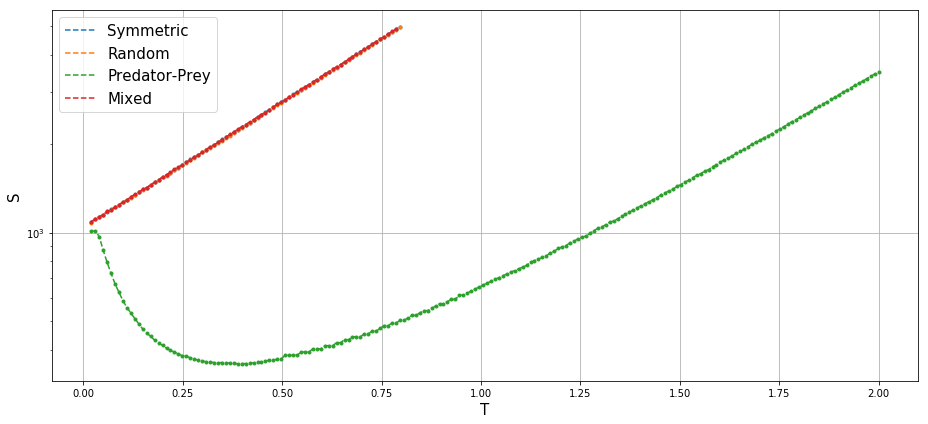

In [48]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,6)

for s in range(4):
    ind= Svec[:,s]<5000
    plt.plot(Tvec[ind],Svec[:,s][ind],'.',color=colors[s])
    plt.plot(Tvec[ind],Svec[:,s][ind],'--',color=colors[s],label=ty[s])

plt.yscale('log')
plt.xlabel('T',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.legend(fontsize=12,markerscale=2,facecolor='w')
plt.grid()
fig.tight_layout()
plt.show(fig)

# Comparison of W with approximations

In [62]:
def W_approx(z):
    phi = np.log(1+np.sqrt(2*np.e*z+2,dtype=complex),dtype=complex)
    return -1 + phi + phi**2/6 #- phi**3/72 - 7*phi**4/2160 + 7*phi**5/5760

def lambda_funct_approx (evlA,evlB,T):
    tt = np.all(evlA==0) or np.all(evlB==0)
    if T!=0:
        return evlA + W_approx(evlB*T*np.exp(-evlA*T))/T
    elif T==0 and tt:
        return (evlA+evlB)

In [63]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

complexity = sigma*np.sqrt(S*C)
Class = RMG(S,C,d,mu,sigma)

In [64]:
Iterations = 10
I = np.vectorize(int)
Tvec = [[0,0.5,0.8,0.9,1,2,10],[0,0.5,0.6,0.7,1,2,10],[0,0.05,0.1,0.3,1,2,10],[0,0.5,0.8,0.9,1,2,10]]
Svec = I(10**np.linspace(np.log10(20.1),np.log10(2000),101))
funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten
data1 = np.zeros((len(Svec),10,4,Iterations))

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]): 
                evl  = lambda_funct (0,evlB,T)
                data[i,j,s,tt] = np.amax(evl.real)
                evl  = lambda_funct_approx (0,evlB,T)
                data1[i,j,s,tt] = np.amax(evl.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)
Std1  = np.std(data1,axis=3)
EE1 = np.mean(data1,axis=3)

0
1
2
3


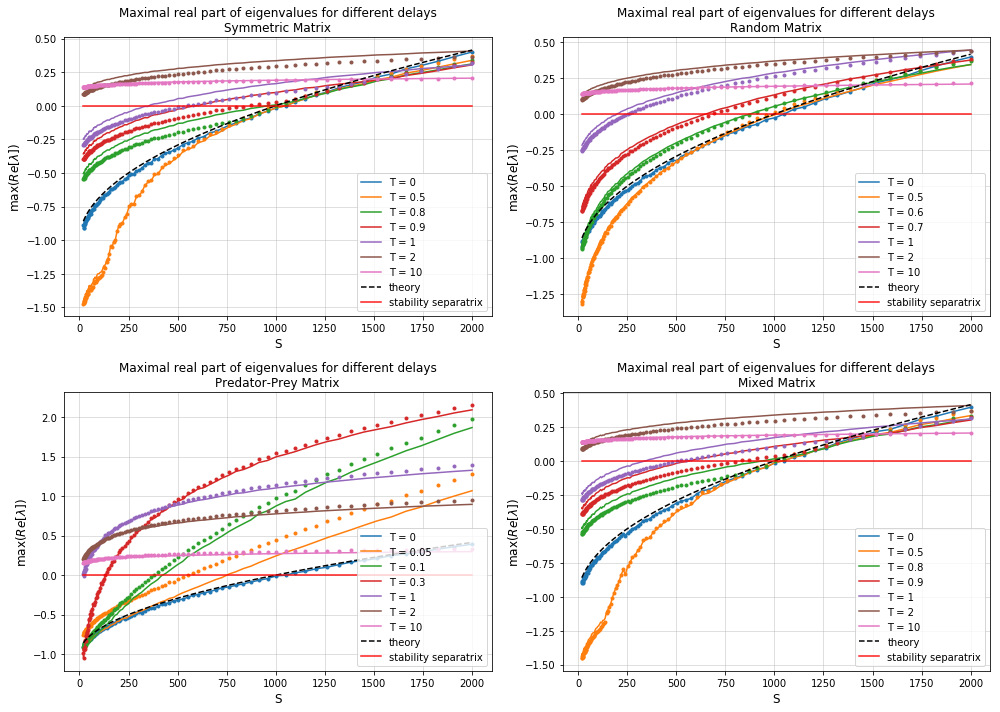

In [65]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(Svec,EE[:,j,s],'-',color=colors[j],label=f'T = {T}')
        plt.plot(Svec,EE1[:,j,s],'.',color=colors[j])
    plt.plot(Svec,sigma*np.sqrt(Svec*C)-1,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec)),'r-',label='stability separatrix',alpha=0.9)
    
    plt.xlabel('S',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)

# Comparison between cases: 
$$\dot{x} = Ax(t)+f(T)Bx(t-T)\qquad \text{vs}\qquad \dot{x} = Ax(t)+f(T)Bx(t)$$

In [27]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 0          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

Class = RMG(S,C,d,mu,sigma)

In [28]:
Iterations = 10
I = np.vectorize(int)
Tvec = [[0,0.1,0.5,1],[0,0.1,0.5,1],[0,0.05,0.1,0.3,1,2],[0,0.1,0.5,1]]
Svec = I(10**np.linspace(np.log10(100.1),np.log10(10000),201))
funct = funct = ['sym','ran','pp','mix']
sig = [1/np.sqrt(2),1,np.pi/(np.pi-2),np.pi/(np.pi+2)]
data = np.zeros((len(Svec),10,4,Iterations)) #Here the maximal number of delays accepted is ten
data1 = np.zeros((len(Svec),10,4,Iterations))

for s,elem in enumerate(funct):
    Class.sigma = 0.1*sig[s]
    print(s)
    for i,S in enumerate(Svec):
        Class.S = S
        for tt in range(Iterations):
            evlB = Class.generate_eigenvalues(mat=elem)
            for j,T in enumerate(Tvec[s]):
                a = -1.
                b = np.exp(a*T)
                evl = 0
                if T == 0:
                    evl  = lambda_funct (0,a+evlB,T)
                else:
                    evl  = lambda_funct (a*np.ones(evlB.shape[0]),b*evlB,T)
                evl1 = a+b*evlB
                data[i,j,s,tt] = np.amax(evl.real)
                data1[i,j,s,tt] = np.amax(evl1.real)
Std  = np.std(data,axis=3)
EE = np.mean(data,axis=3)
Std1  = np.std(data1,axis=3)
EE1 = np.mean(data1,axis=3)

0
1
2
3


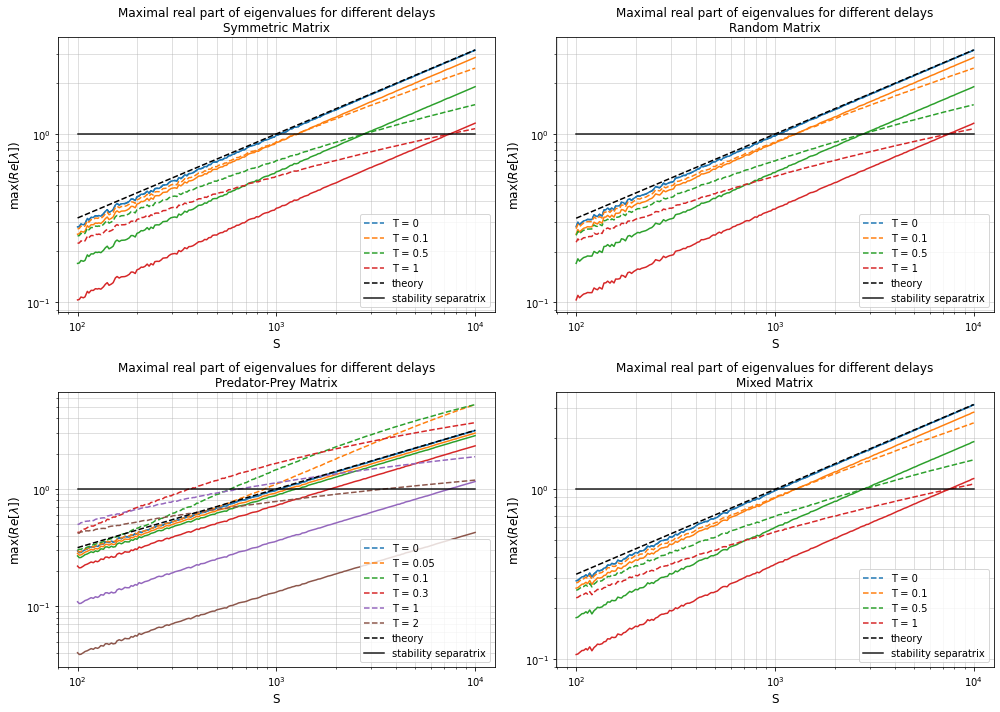

In [29]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,10)

Type = ['Symmetric Matrix','Random Matrix','Predator-Prey Matrix','Mixed Matrix']
for s in range(4):
    plt.subplot(2,2,s+1)
    for j,T in enumerate(Tvec[s]):
        plt.plot(Svec,EE[:,j,s]-a,'--',color=colors[j],label=f'T = {T}')
        plt.plot(Svec,EE1[:,j,s]-a,'-',color=colors[j]) 
    plt.plot(Svec,sigma*np.sqrt(Svec*C)-1-a,'k--',label='theory')
    plt.plot(Svec,np.zeros(len(Svec))-a,'k-',label='stability separatrix',alpha=0.9)
    
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('S',fontsize=12)
    plt.ylabel('max($Re[\lambda]$)',fontsize=12)
    plt.title("Maximal real part of eigenvalues for different delays\n"+Type[s])
    plt.grid(which="both",alpha=0.5)
    plt.legend()

fig.tight_layout()
plt.show(fig)